###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> FIT5145 Assignment 1
Name: Angel Das

Student ID: 31131867   

###  <span style="font-family: Calibri; font-weight:bold;font-size:1.5em;color:#000055"> Problem Context:
    
The way we supply and use energy in Australia is changing. To understand these changes, to plan for
Australia’s energy future, and to make sound policy and investment decisions, we need timely, accurate,
comprehensive and readily-accessible energy data. The Department of Industry, Science, Energy and
Resources is responsible for compiling and publishing Australia’s official energy statistics and balances1.
The is updated annually and consists of historical energy consumption, production and trade statistics.

In this task, you are required to explore the statistics covering all electricity generation in Australia. This
includes by power plants, and by businesses and households for their own use, in all states and
territories. This also includes both on and off grid generation. We have extracted the data from the
original files and restricted it to a specific time period.

###  <span style="font-family: Calibri; font-weight:bold;font-size:1.5em;color:#000055"> Field Description:

1. State: Names of different Australian states
2. Fuel_Type: The type of fuel which is consumed
3. Category: Determines whether a fuel is considered as a renewable or nonrenewable
4. Years: Years which the energy consumptions are recorded

###  <span style="font-family: Calibri; font-weight:bold;font-size:1.5em;color:#000055"> Contents:

1. Investigating the Energy Generation data for Victoria
2. Investigating the Energy Generation data for Australia
3. Visualising the Relationship over Time


####  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000055"> A1. Investigating the Energy Generation data for Victoria

<font color=darkblue>
&nbsp;

In [2]:
#----------------------------------------Importing required libraries----------------------------------------
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display #---------------------for displaying multiple data frames in one output

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package for generating test and train data

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1. First, read the data for Victoria state into a dataframe. You will observe that some values for the fuel types (eg. Black coal etc.) are missing or have ‘Nan’. To handle it, replace these values with zero (using appropriate python code) before proceeding with the rest of the questions </font>

------------------------------------------------------------------------------------------------------------------------------

In [2]:
#----------------------------------------Reading dataset Energy Data----------------------------------------

energy_data_victoria=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='VIC')

In [3]:
#----------------------------------------Data Description using head(), shape, size and isnull()--------------------------------

display(energy_data_victoria.head(11)) #--------------------Visualize entire data 11 is used

print("Shape: ", energy_data_victoria.shape)
print("Size:", energy_data_victoria.size)

display(energy_data_victoria.isnull().any())


,State,Fuel_Type,Category,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,VIC,Black coal,Non-renewable fuels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9,36.3,NaN
1,VIC,Brown coal,Non-renewable fuels,52094.0,51541.7,51066.5,52059.7,45317.6,43977.7,48336.8,46202.2,43557.8,36067.0
2,VIC,Natural gas,Non-renewable fuels,1451.9,1697.9,1289.8,1142.5,3247.7,3239.3,2390.9,1892.2,2658.7,3899.4
3,VIC,Oil products,Non-renewable fuels,20.4,1.1,38.2,4.0,10.7,145.8,156.0,70.6,109.3,164.8
4,VIC,Other,Non-renewable fuels,61.1,115.9,114.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VIC,Biomass,Renewable fuels,292.0,303.4,339.6,859.3,845.1,886.9,672.2,747.7,694.5,661.8
6,VIC,Wind,Renewable fuels,573.0,1406.0,1434.4,1416.2,2005.1,2771.9,3067.8,3341.8,3560.9,4224.2
7,VIC,Hydro,Renewable fuels,557.8,843.7,1118.5,1047.4,940.3,1103.0,1170.9,1207.6,824.8,785.3
8,VIC,Large-scale solar PV,Renewable fuels,NaN,NaN,NaN,NaN,NaN,4.4,9.1,11.5,13.8,39.4
9,VIC,Small-scale solar PV,Renewable fuels,24.1,66.2,205.5,378.7,580.1,674.2,874.8,-1056.1,1231.7,1481.2


Shape:  (11, 13)
Size: 143


State        False
Fuel_Type    False
Category     False
2009          True
2010          True
2011          True
2012          True
2013          True
2014          True
2015          True
2016          True
2017          True
2018          True
dtype: bool

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Energy data for Victoria consists of 11 rows and 13 columns
2. All numeric columns have null values
3. Total energy produced by Small-scale solar PV in 2016 is negative (-1056.1)

In [4]:
#----------------------------------------Replacing nulls with zero----------------------------
energy_data_victoria.fillna(0, inplace=True)

#----------------------------------------QC: Min for all numeric columns should be zero----------------------------
energy_data_victoria.describe().T

,count,mean,std,min,25%,50%,75%,max
2009,11.0,5006.754545,15623.312106,0.0,10.20,61.1,565.40,52094.0
2010,11.0,5088.718182,15418.763429,0.0,0.55,115.9,1124.85,51541.7
2011,11.0,5055.181818,15270.324765,0.0,19.10,205.5,1204.15,51066.5
2012,11.0,5173.436364,15559.862737,0.0,0.00,378.7,1094.95,52059.7
2013,11.0,4813.327273,13473.449914,0.0,0.00,580.1,1472.70,45317.6
2014,11.0,4800.290909,13043.093551,0.0,2.20,674.2,1937.45,43977.7
2015,11.0,5152.590909,14360.172226,0.0,4.55,672.2,1780.90,48336.8
2016,11.0,4768.127273,13792.913952,-1056.1,5.75,70.6,1549.90,46202.2
2017,11.0,4789.800000,12912.628608,0.0,25.05,694.5,1945.20,43557.8
2018,11.0,4302.100000,10646.907094,0.0,19.70,661.8,2690.30,36067.0


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.a) Using Python, plot the total energy generation in Victoria over the time period covered in the dataset (2009 to 2018). Describe the trend you see in the overall energy generation for the given time period. </font>

------------------------------------------------------------------------------------------------------------------------------

In [5]:
#----------------------------------------Aggregating and Transposing data into required shape----------------------------
#----------------------------------------Level of the data: Year, Fuel_Type----------------------------
energy_pivot = energy_data_victoria.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()

energy_pivot.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot.head()


,Year,State,Fuel_Type,Category,Energy
0,2009,VIC,Biomass,Renewable fuels,292.0
1,2009,VIC,Black coal,Non-renewable fuels,0.0
2,2009,VIC,Brown coal,Non-renewable fuels,52094.0
3,2009,VIC,Geothermal,Renewable fuels,0.0
4,2009,VIC,Hydro,Renewable fuels,557.8


In [6]:
#----------------------------------------Summarizing data by year, state and calculating total Energy----------------------------
#----------------------------------------State could have been omitted because data is present for Victoria only----------------
tot_energy_vic=energy_pivot.groupby(['Year','State']).agg(Total_Energy=('Energy','sum')).reset_index()

tot_energy_vic.head(10)

,Year,State,Total_Energy
0,2009,VIC,55074.3
1,2010,VIC,55975.9
2,2011,VIC,55607.0
3,2012,VIC,56907.8
4,2013,VIC,52946.6
5,2014,VIC,52803.2
6,2015,VIC,56678.5
7,2016,VIC,52449.4
8,2017,VIC,52687.8
9,2018,VIC,47323.1


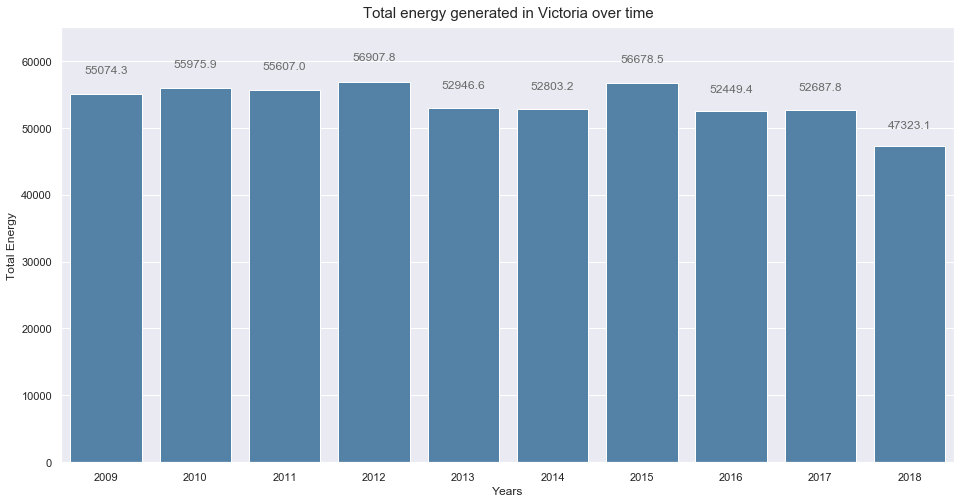

In [7]:
#---------------------------------------Plotting data using seaborn----------------------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Total energy generated in Victoria over time',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 65000) #------------------------Setting Range for Y Axis

g=sns.barplot(tot_energy_vic['Year'],tot_energy_vic['Total_Energy'],color="steelblue"); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='Total Energy'); #------------------------Changing Labels of x and y axis


for index, row in tot_energy_vic.iterrows():
    g.text(row.name,row.Total_Energy*1.05, round(row.Total_Energy,2), fontsize=12, color='dimgrey', ha="center", va="bottom")
    

plt.show()

In [8]:
#---------------------------------------Calculating YoY change in Energy Generation----------------------------
tot_energy_vic['Growth_Degrowth_Energy']=tot_energy_vic['Total_Energy'].pct_change()*100

tot_energy_vic['Growth_Degrowth_Energy']=tot_energy_vic['Growth_Degrowth_Energy'].fillna(0)


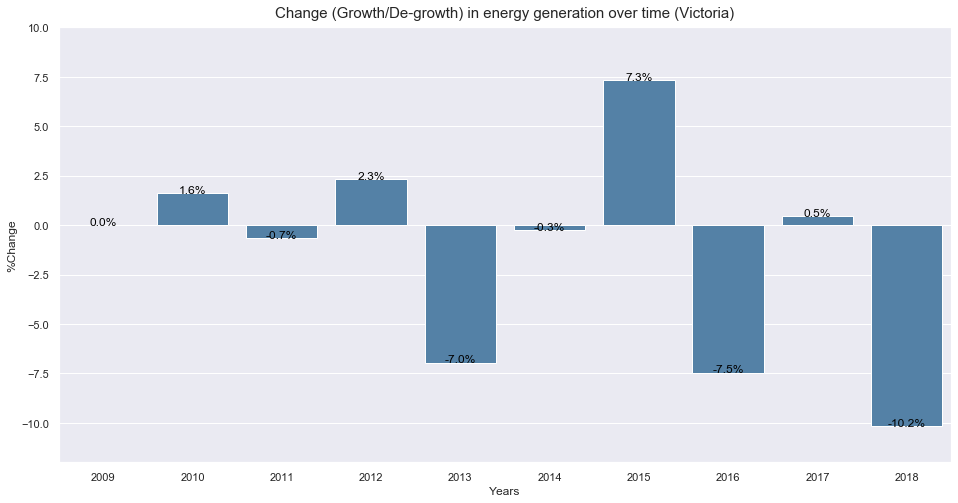

In [9]:
#---------------------------------------Plotting data using seaborn----------------------------
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Change (Growth/De-growth) in energy generation over time (Victoria)',fontsize=15, pad=10) 
#---------------------Title of the chart

plt.ylim(-12, 10) #------------------------Setting Range for Y Axis

g=sns.barplot(tot_energy_vic['Year'],tot_energy_vic['Growth_Degrowth_Energy'],color="steelblue"); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='%Change'); #------------------------Changing Labels of x and y axis


for index, row in tot_energy_vic.iterrows():
    g.text(row.name,row.Growth_Degrowth_Energy, str(round(row.Growth_Degrowth_Energy,1))+"%", fontsize=12, color='black', ha="center")
    

plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Total energy generated in Victoria didn't see many variations across the years, however, post-2012 a drop in energy generated is observed for the following years except for the year 2015
2. Years 2013, 2016 & 2018 observed a de-growth of 7.0%, 7.5% & 10.2% respectively in energy generation when compared to the previous year
3. The highest growth of 7.3% in energy generation was observed in 2015

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.b) Draw a new plot showing the trend in total renewable and non-renewable energy
generation for the same time period? What trend can you observe from this graph? </font>

------------------------------------------------------------------------------------------------------------------------------

In [10]:
#----------------------------------------Summarizing data by year, state and calculating total Energy---------------------------
tot_energy_vic_cat=energy_pivot.groupby(['Year','Category']).agg(Total_Energy=('Energy','sum')).reset_index()

tot_energy_vic_cat.head(5)

,Year,Category,Total_Energy
0,2009,Non-renewable fuels,53627.4
1,2009,Renewable fuels,1446.9
2,2010,Non-renewable fuels,53356.6
3,2010,Renewable fuels,2619.3
4,2011,Non-renewable fuels,52509.0


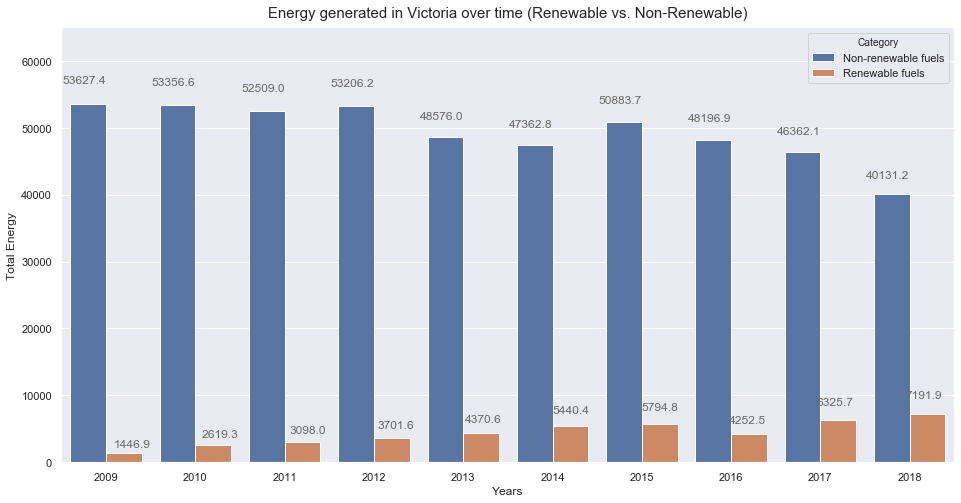

In [11]:
#---------------------------------------Plotting data using seaborn----------------------------
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Energy generated in Victoria over time (Renewable vs. Non-Renewable)',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 65000) #------------------------Setting Range for Y Axis

g=sns.barplot(tot_energy_vic_cat['Year'],tot_energy_vic_cat['Total_Energy'],hue=tot_energy_vic_cat['Category']); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='Total Energy'); #------------------------Changing Labels of x and y axis

x1_data=tot_energy_vic_cat[tot_energy_vic_cat['Category']=='Non-renewable fuels']
x2_data=tot_energy_vic_cat[tot_energy_vic_cat['Category']=='Renewable fuels']

for index, row in x1_data.iterrows():
    g.text(row.name/2,row.Total_Energy*1.05, round(row.Total_Energy,2), fontsize=12, color='dimgrey', ha="right", va="bottom")
    
for index, row in x2_data.iterrows():
    g.text(row.name/2.03,(row.Total_Energy)*1.3, round(row.Total_Energy,2), fontsize=12, color='dimgrey', ha="right", va="bottom")
    
plt.show()

In [12]:
#---------------------------------------Calculating Growth & Degrowth in enrgy----------------------------

ener_vic_ren=tot_energy_vic_cat[tot_energy_vic_cat['Category']=='Non-renewable fuels']

ener_vic_nonren=tot_energy_vic_cat[tot_energy_vic_cat['Category']=='Renewable fuels']

comb_enrgy_data=pd.merge(ener_vic_ren,ener_vic_nonren,on="Year",how="inner")

comb_enrgy_data.rename(columns = {'Total_Energy_x':'Nonren_Energy', 'Total_Energy_y':'Ren_Energy'}, inplace = True)

comb_enrgy_data['G_Deg_Non(%)']=comb_enrgy_data['Nonren_Energy'].pct_change().round(3)*100

comb_enrgy_data['G_Deg_Non(%)']=comb_enrgy_data['G_Deg_Non(%)'].fillna(0)

comb_enrgy_data['G_Deg_re(%)']=comb_enrgy_data['Ren_Energy'].pct_change().round(3)*100

comb_enrgy_data['G_Deg_re(%)']=comb_enrgy_data['G_Deg_re(%)'].fillna(0)


comb_enrgy_data.head(10)

,Year,Category_x,Nonren_Energy,Category_y,Ren_Energy,G_Deg_Non(%),G_Deg_re(%)
0,2009,Non-renewable fuels,53627.4,Renewable fuels,1446.9,0.0,0.0
1,2010,Non-renewable fuels,53356.6,Renewable fuels,2619.3,-0.5,81.0
2,2011,Non-renewable fuels,52509.0,Renewable fuels,3098.0,-1.6,18.3
3,2012,Non-renewable fuels,53206.2,Renewable fuels,3701.6,1.3,19.5
4,2013,Non-renewable fuels,48576.0,Renewable fuels,4370.6,-8.7,18.1
5,2014,Non-renewable fuels,47362.8,Renewable fuels,5440.4,-2.5,24.5
6,2015,Non-renewable fuels,50883.7,Renewable fuels,5794.8,7.4,6.5
7,2016,Non-renewable fuels,48196.9,Renewable fuels,4252.5,-5.3,-26.6
8,2017,Non-renewable fuels,46362.1,Renewable fuels,6325.7,-3.8,48.8
9,2018,Non-renewable fuels,40131.2,Renewable fuels,7191.9,-13.4,13.7


-------------------------------------------------------------------------------------------------------------------------------
Findings:
1. Energy generated from non-renewable energy sources remained almost flat for the first 4 years till 2012, however, observed a drop post-2013
2. A decline in energy generated from non-renewable energy sources is noticeable post-2015 with the lowest generation observed in 2018; A drop of 13.4% when compared to the previous year
3. Generation of renewable energy has been on the rise from 2009 till 2018, except for 2016 where overall energy generated in Victoria was the lowest when compared across all the years


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.c) Draw a bar chart showing the breakdown of the different fuel types used for energy
generation in 2009 vs in 2018? Explain your observation </font>

------------------------------------------------------------------------------------------------------------------------------

In [13]:
#---------------------------------------Since data is at Year & Fuel_Type level, just filtering out for relevant years----------
year_filter=[2009,2018]

energy_2009_2018=energy_pivot[energy_pivot['Year'].isin(year_filter)] #----------------filtering for years

display(energy_2009_2018.head(11))

print('Unique Years in the Dataset: \n')

energy_2009_2018['Year'].unique() #----------------QC: Checking if year filter was applied correctly

,Year,State,Fuel_Type,Category,Energy
0,2009,VIC,Biomass,Renewable fuels,292.0
1,2009,VIC,Black coal,Non-renewable fuels,0.0
2,2009,VIC,Brown coal,Non-renewable fuels,52094.0
3,2009,VIC,Geothermal,Renewable fuels,0.0
4,2009,VIC,Hydro,Renewable fuels,557.8
5,2009,VIC,Large-scale solar PV,Renewable fuels,0.0
6,2009,VIC,Natural gas,Non-renewable fuels,1451.9
7,2009,VIC,Oil products,Non-renewable fuels,20.4
8,2009,VIC,Other,Non-renewable fuels,61.1
9,2009,VIC,Small-scale solar PV,Renewable fuels,24.1


Unique Years in the Dataset: 



array([2009, 2018], dtype=int64)

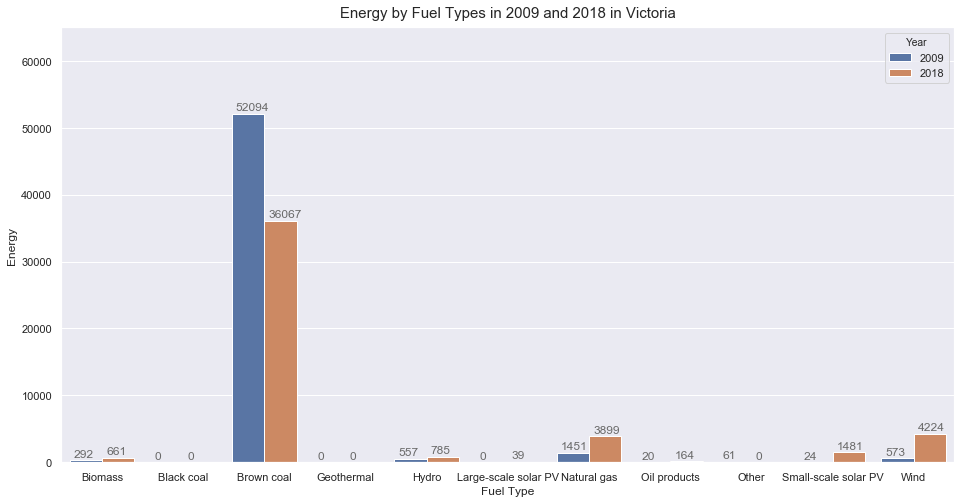

In [14]:
#---------------------------------------Plotting data using seaborn----------------------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Energy by Fuel Types in 2009 and 2018 in Victoria',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 65000) #------------------------Setting Range for Y Axis

g=sns.barplot(energy_2009_2018['Fuel_Type'],energy_2009_2018['Energy'],hue=energy_2009_2018['Year']); #------ replace line plot with bar plot

ax.set(xlabel='Fuel Type', ylabel='Energy'); #------------------------Changing Labels of x and y axis

x1_yr_2009=energy_2009_2018[energy_2009_2018['Year']==2009]
x1_yr_2009=x1_yr_2009[['Fuel_Type','Energy']]
x2_yr_2018=energy_2009_2018[energy_2009_2018['Year']==2018]
x2_yr_2018=x2_yr_2018[['Fuel_Type','Energy']]

for value in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(value.get_x()+0.05, value.get_height()+500,int((value.get_height())), fontsize=12, color='dimgrey',rotation=0)


plt.show()

Reference: (Used for plotting text on the graph)

Mitchell, R. (2015). BAR CHART ANNOTATIONS WITH PANDAS AND MATPLOTLIB. [online] robertmitchellv.com. Available at: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html.

‌

-------------------------------------------------------------------------------------------------------------------------------
Findings:
1. Brown coal, a non-renewable fuel type contributes to the majority of energy generation in victoria (in both the years)
2. Use of Brown coal saw a considerable drop in 2018 when compared to 2009
3. Use of renewable fuel types like Biomass, Hydro, Wind, Large & Small-scale solar PV saw an increase in 2018 when compared to 2009
4. Although the use of non-renewable fuel like Brown coal saw a decile in 2018 when compared to 2009, other non-renewable fuels like Natural gas saw an increase in usage for the same period under consideration

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.d) What was the most used energy resource (fuel-type) in 2015? Which renewable fuel type was the least used in 2015? </font>

------------------------------------------------------------------------------------------------------------------------------

In [15]:
#---------------------------------------Filtering data for 2015 only----------------------------

energy_data_2015=energy_pivot[energy_pivot['Year']==2015]

print('Unique Years in the Dataset: \n')
print(energy_data_2015['Year'].unique()) #-------------QC: Unique years

tot_energy_vic_type=energy_data_2015.groupby(['Category','Fuel_Type']\
                                            ).agg(Total_Energy=('Energy','sum')).reset_index().sort_values(by=['Category','Total_Energy'],ascending=False)


#--------------------------------------Calculating % of Total energy--------------------------------------------
tot_energy_vic_type['Per_Energy_Overall']=round((tot_energy_vic_type['Total_Energy']/tot_energy_vic_type['Total_Energy'].sum(axis=0)*100),1).astype(str)+"%"
tot_energy_vic_type.head(23)

Unique Years in the Dataset: 

[2015]


,Category,Fuel_Type,Total_Energy,Per_Energy_Overall
10,Renewable fuels,Wind,3067.8,5.4%
7,Renewable fuels,Hydro,1170.9,2.1%
9,Renewable fuels,Small-scale solar PV,874.8,1.5%
5,Renewable fuels,Biomass,672.2,1.2%
8,Renewable fuels,Large-scale solar PV,9.1,0.0%
6,Renewable fuels,Geothermal,0.0,0.0%
1,Non-renewable fuels,Brown coal,48336.8,85.3%
2,Non-renewable fuels,Natural gas,2390.9,4.2%
3,Non-renewable fuels,Oil products,156.0,0.3%
0,Non-renewable fuels,Black coal,0.0,0.0%


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Brown coal was the most used energy resource in 2015 and contributed to 85.3% of overall energy resources used (both renewable and non-renewable)
2. Of all renewable fuels, Geothermal was least used in 2015


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.e) Draw a plot showing the percentage of Victoria's energy generation coming from
Renewable vs Non-Renewable energy sources over the period 2009 to 2018. What can you say about the trend you observe? </font>

------------------------------------------------------------------------------------------------------------------------------

In [16]:
#---------------------------------------Join datasets tot_energy_vic & tot_energy_vic_cat-------------------------------

energy_vic_intermediate=pd.merge(tot_energy_vic_cat,tot_energy_vic,on='Year')

energy_vic_intermediate.rename(columns = {'Total_Energy_x':'Cat_Energy', 'Total_Energy_y':'Total_Energy'}, inplace = True)

energy_vic_intermediate=energy_vic_intermediate.iloc[:,0:5] #----------------Getting required columns only

energy_vic_intermediate.head()

,Year,Category,Cat_Energy,State,Total_Energy
0,2009,Non-renewable fuels,53627.4,VIC,55074.3
1,2009,Renewable fuels,1446.9,VIC,55074.3
2,2010,Non-renewable fuels,53356.6,VIC,55975.9
3,2010,Renewable fuels,2619.3,VIC,55975.9
4,2011,Non-renewable fuels,52509.0,VIC,55607.0


In [17]:
#---------------------------------Calculating percentage of energy of Total----------------------------------------------
energy_vic_intermediate['Per_Total']=((energy_vic_intermediate['Cat_Energy']/energy_vic_intermediate['Total_Energy'])*100).round(1)

energy_vic_intermediate.head()

,Year,Category,Cat_Energy,State,Total_Energy,Per_Total
0,2009,Non-renewable fuels,53627.4,VIC,55074.3,97.4
1,2009,Renewable fuels,1446.9,VIC,55074.3,2.6
2,2010,Non-renewable fuels,53356.6,VIC,55975.9,95.3
3,2010,Renewable fuels,2619.3,VIC,55975.9,4.7
4,2011,Non-renewable fuels,52509.0,VIC,55607.0,94.4


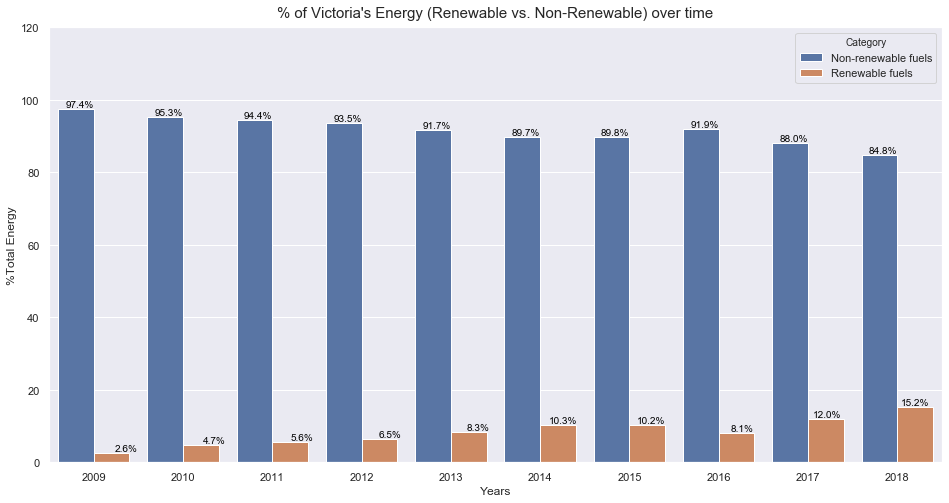

In [18]:
#---------------------------------------Plotting data using seaborn----------------------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('% of Victoria\'s Energy (Renewable vs. Non-Renewable) over time', fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 120) #------------------------Setting Range for Y Axis

g=sns.barplot(energy_vic_intermediate['Year'],energy_vic_intermediate['Per_Total'],hue=energy_vic_intermediate['Category']); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='%Total Energy'); #------------------------Changing Labels of x and y axis

x1_data=energy_vic_intermediate[energy_vic_intermediate['Category']=='Non-renewable fuels']
x2_data=energy_vic_intermediate[energy_vic_intermediate['Category']=='Renewable fuels']

for index, row in x1_data.iterrows():
    g.text(row.name/2,row.Per_Total,str(row.Per_Total)+'%', color='black', ha="right", va="bottom")
    
for index, row in x2_data.iterrows():
    g.text(row.name/2.03,(row.Per_Total), str(row.Per_Total)+'%', color='black', ha="right", va="bottom")
    
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. % of the energy generated from renewable fuels increased over the years from 2009 till 2018 and saw of growth of +12.6 pp (percentage points) from 2009 to 2018
2. % of the energy generated from non-renewable fuels decreased over the years from 2009 till 2018 and saw of de-growth of -12.6 pp (percentage points) from 2009 to 2018
3. The only exception was the year 2016, where although non-renewable energy used was less when compared to 2015 (refer to 1b), but the proportion of non-renewable energy used was higher than 2015


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.f) Using a linear regression model, predict what percentage of Victoria’s energy generation will come from Renewable energy sources in the year 2030, 2100? Do the predictions seem reasonable? </font>

------------------------------------------------------------------------------------------------------------------------------

Assumptions of Linear Regression:

1. The dependent and independent variables have some sort of linear relationship
2. Data are a random sample of the population. i.e. errors are independent or uncorrelated
3. The Variance of error/residual is constant, i.e. model behaves similarly for different values of y - heteroscedasticity
4. The error between the predicted and actual value is expected to be zero
5. No multicollinearity between independent variable; Can be checked using a variance inflation factor

In this problem, the Equation is Energy = m*Year + c, where m is the slope, and c is the intercept. m & c are also known as model coefficients or parameters; Energy is the dependent variable and Year is the independent one.

Reference:
Sharma, M. (2020). Linear Regression and its Assumptions. [online] Medium. Available at: https://towardsdatascience.com/linear-regression-and-its-assumptions-ef6e8db4904d [Accessed 1 May 2020].

In [19]:
#-------------------------------------Getting Year & Category Data; Created above for solving problem 1b---------------------
energy_vic_intermediate.head()

#energy_vic_intermediate.to_csv('energy_data.csv', encoding='utf-8')

,Year,Category,Cat_Energy,State,Total_Energy,Per_Total
0,2009,Non-renewable fuels,53627.4,VIC,55074.3,97.4
1,2009,Renewable fuels,1446.9,VIC,55074.3,2.6
2,2010,Non-renewable fuels,53356.6,VIC,55975.9,95.3
3,2010,Renewable fuels,2619.3,VIC,55975.9,4.7
4,2011,Non-renewable fuels,52509.0,VIC,55607.0,94.4


In [20]:
data_reg=energy_vic_intermediate[energy_vic_intermediate['Category']=='Renewable fuels']
data_reg=data_reg.drop('Category',axis=1)

# data_reg['Growth_Per']=data_reg['Total_Energy'].pct_change()*100

# #-----------------------Filtering abnormal growth figures-----------------------
# growth_data=data_reg[data_reg['Growth_Per']<50]
# print("Average Growth: ", round(growth_data['Growth_Per'].mean(),0))

# data_reg['Growth_Per']=(data_reg['Growth_Per'].fillna(0)).round(1).astype(str)+"%"

display(data_reg.head(10))


,Year,Cat_Energy,State,Total_Energy,Per_Total
1,2009,1446.9,VIC,55074.3,2.6
3,2010,2619.3,VIC,55975.9,4.7
5,2011,3098.0,VIC,55607.0,5.6
7,2012,3701.6,VIC,56907.8,6.5
9,2013,4370.6,VIC,52946.6,8.3
11,2014,5440.4,VIC,52803.2,10.3
13,2015,5794.8,VIC,56678.5,10.2
15,2016,4252.5,VIC,52449.4,8.1
17,2017,6325.7,VIC,52687.8,12.0
19,2018,7191.9,VIC,47323.1,15.2


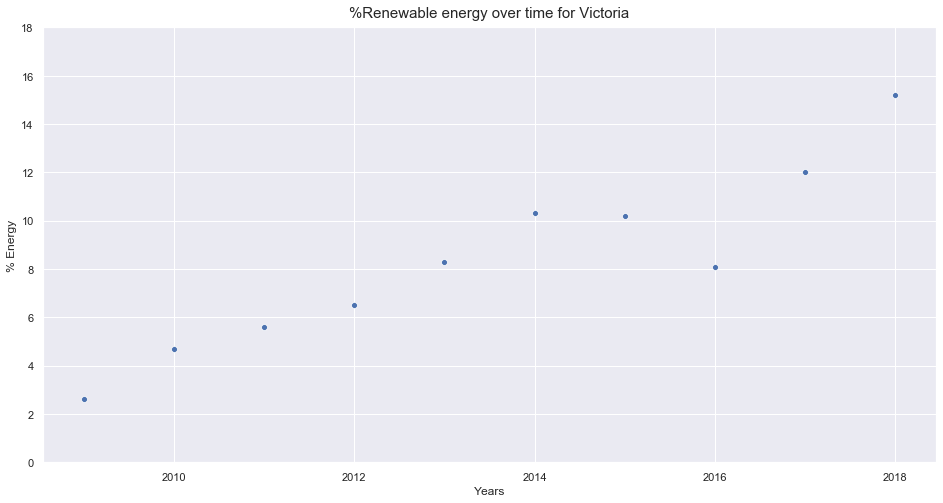

In [21]:
#-------------Scatter plot to check if linearity exists between year and %Total energy from renewable resources-----------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('%Renewable energy over time for Victoria', fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 18) #------------------------Setting Range for Y Axis

sns.scatterplot(data_reg['Year'],data_reg['Per_Total'])

ax.set(xlabel='Years', ylabel='% Energy'); #------------------------Changing Labels of x and y axis


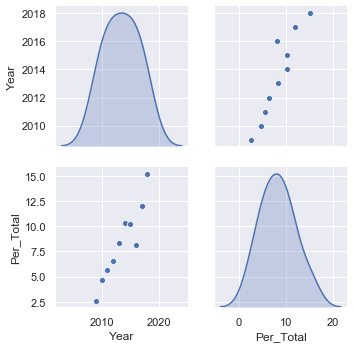

In [22]:
#--------------------------------------Bivariate + Univariate plot of variables Year & % energy-----------------------
sns.pairplot(data_reg[["Year","Per_Total"]], diag_kind='kde');

In [23]:
#-------------------------------------Building regression model-------------------------------------
#-------------------------------------Energy is the independent variable here-------------------------------------
PerEnergy = data_reg.drop(['Year','State','Cat_Energy','Total_Energy'], axis=1)

#-------------------------------------Year is the dependent variable here-------------------------------------
Year = data_reg[['Year']]

In [24]:
#-------------------------------------Train:Test (70:30) Split-------------------------------------
year_train, year_test, perenergy_train, perenergy_test = train_test_split(Year, PerEnergy, test_size=0.30, random_state=1)


Reference:

Scikit-learn.org. (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [25]:
#-------------------------------------Running the model------------------------------
lr_model = LinearRegression()
lr_model.fit(year_train, perenergy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#-------------------------------------Getting model parameters------------------------------
print("Value of slope (m):", lr_model.coef_[0])

intercept = lr_model.intercept_[0]
print("Intercept (c):", intercept)

Value of slope (m): [0.99230769]
Intercept (c): -1990.0153846153846


In [27]:
#------------------------------------Getting R-square to determine goodness of fit using test data----------------------------
print("R - square value for Training data:", lr_model.score(year_train, perenergy_train).round(5))

#-----------------------------------Importing necessary functions from sklearn-------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#-----------------------------------Making Prediction for test years----------------------------------------------------------- 
pred_energy=lr_model.predict(year_test)

print("R - square value for Test/Validation data:", round(r2_score(perenergy_test, pred_energy),5))

R - square value for Training data: 0.82666
R - square value for Test/Validation data: 0.8261


So the equation is:
PerEnergy = 0.99230769 * Year - 1990.0153846153846

In [28]:
#------------------------------------Prediction for 2030----------------------------------
energy_2030 = (0.99230769 * 2030)  -1990.0153846153846
print("Energy in 2030 from Renewable sources:", str(round(energy_2030,1))+'%')

Energy in 2030 from Renewable sources: 24.4%


In [29]:
#------------------------------------Prediction for 2100------------------------------------------------------------------
energy_2100 = (0.99230769 * 2100)  -1990.0153846153846
print("Energy in 2100 from Renewable sources:", str(round(energy_2100,1))+'%')

Energy in 2100 from Renewable sources: 93.8%


In [30]:
#----------------------------------QC (Quality Check): Predicted Values----------------------------------------------------
predict_year=pd.DataFrame(range(2019,2031,1),columns=['Year']);

display(lr_model.predict(predict_year).round(1));

array([[13.5],
       [14.4],
       [15.4],
       [16.4],
       [17.4],
       [18.4],
       [19.4],
       [20.4],
       [21.4],
       [22.4],
       [23.4],
       [24.4]])

Reference:

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, [online] 12(Oct), pp.2825–2830. Available at: http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.

In [31]:
#-------------------------------------------Analyzing Regression Summary----------------------------------------------
import statsmodels.api as sm

import statsmodels.formula.api as smf

YR = sm.add_constant(year_train) # sm.OLS by default does not add an intercept in the model

lr_model_check= sm.OLS(perenergy_train,YR).fit()

#-----------------------------------------Model Statistics--------------------------------------------------------------
print(lr_model_check.summary())

                            OLS Regression Results                            
Dep. Variable:              Per_Total   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     23.84
Date:                Fri, 01 May 2020   Prob (F-statistic):            0.00454
Time:                        16:50:52   Log-Likelihood:                -11.430
No. Observations:                   7   AIC:                             26.86
Df Residuals:                       5   BIC:                             26.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1990.0154    409.070     -4.865      0.0

Reference:
1. Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
2. www.statsmodels.org. (n.d.). Introduction — statsmodels. [online] Available at: https://www.statsmodels.org/stable/index.html [Accessed 1 May 2020].

##### Plot of error terms

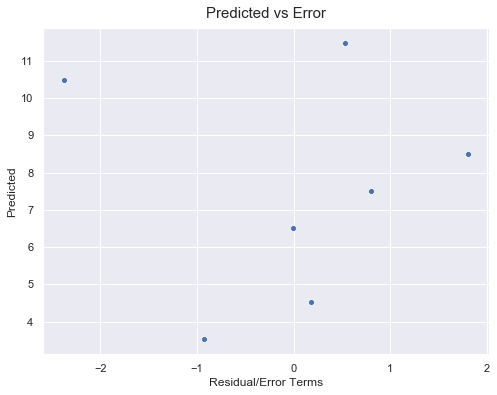

In [32]:
fig, ax = plt.subplots(figsize=(8,6)); #-----------------Setting size of the canvas

plt.title('Predicted vs Error', fontsize=15, pad=10) #---------------------Title of the chart

sns.scatterplot(lr_model_check.resid, lr_model_check.predict()) 

ax.set(xlabel='Residual/Error Terms', ylabel='Predicted'); #------------------------Changing Labels of x and y axis

plt.show()


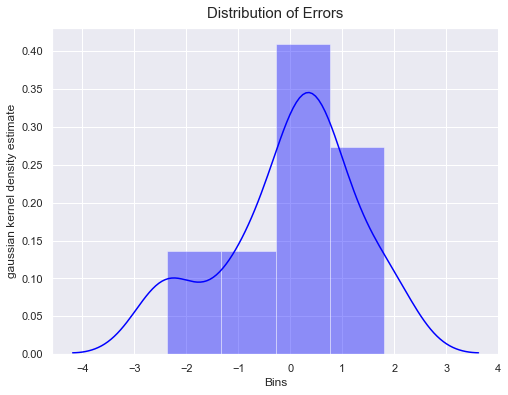

In [33]:
fig, ax = plt.subplots(figsize=(8,6)); #-----------------Setting size of the canvas

plt.title('Distribution of Errors', fontsize=15, pad=10) #---------------------Title of the chart

sns.distplot(lr_model_check.resid, hist=True, kde=True, color="blue") 

ax.set(xlabel='Bins', ylabel='gaussian kernel density estimate'); #------------------------Changing Labels of x and y axis

plt.show()


-------------------------------------------------------------------------------------------------------------------------------
Findings:

Model Results:

1. Regression model shows and R-sqaure value of 0.8267 on training data and 0.8261 on test data
2. Since R-square is closer to 1, the model is able to explain good amount of variance of the data
3. Errors are normally distributed
4. Since we have only one independent variable, multicolinearity is not a factor here

Prediction for 2030:

1. Looking at the trend of renewable energy in Victoria, it's been on the rise since 2010, except for 2016, hence it is expected to be high in the future years
2. YoY average growth in %Renewable energy is 1.4 pp (Percentage Point)
3. Hence in 2030, the prediction that % of Victoria's energy generation coming from Renewable Energy will be 24.4% looks reasonable


Prediction for 2100:

1. Using just 10 points, prediction of values 82 years in the future doesn't seem reasonable
2. The Prediction shows that by 2100, 93.8% of the energy production in Victoria will come from renewable energy sources
3. Given that the consumption of energy is going to increase, and Australia has a good reservoir of coal, I don't think renewable energy will be able to harness 93.8% of the energy demand


####  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000055"> A2. Investigating the Energy Generation data for Australia

<font color=darkblue>
&nbsp;

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1. Let’s do some further investigation by combining the data for all the states and territories in Australia. Read the data for the rest of the states and merge them in a single dataframe. (Hint: you can use a combination of merge, melt or concat operators to get your data in a format suitable for answering the following questions) </font>

------------------------------------------------------------------------------------------------------------------------------

In [34]:
#---------------------------------------Reading sheets(data for other states) from the same excel file----------------------------

energy_data_tas=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='TAS')
energy_data_sa=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='SA')
energy_data_nt=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='NT')
energy_data_qld=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='QLD')
energy_data_nsw=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='NSW')
energy_data_wa=pd.read_excel('D:/Introduction to Data Science/Assignment/Datasets-20200413/energy_data.xlsx',\
                                   sheet_name='WA')

In [35]:
#---------------------------------------Replacing nulls with 0----------------------------
energy_data_tas.fillna(0, inplace=True)
energy_data_sa.fillna(0, inplace=True)
energy_data_nt.fillna(0, inplace=True)
energy_data_qld.fillna(0, inplace=True)
energy_data_nsw.fillna(0, inplace=True)
energy_data_wa.fillna(0, inplace=True)

In [36]:
#--------------------------------------Data Manipulation: Changing Shape of the data----------------------------

energy_pivot_tas = energy_data_tas.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_tas.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot_sa = energy_data_sa.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_sa.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot_nt = energy_data_nt.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_nt.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot_qld = energy_data_qld.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_qld.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot_nsw = energy_data_nsw.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_nsw.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

energy_pivot_wa = energy_data_wa.pivot_table(columns=['State','Fuel_Type','Category'],aggfunc=sum).T.reset_index()
energy_pivot_wa.rename(columns = {'level_0':'Year', 0:'Energy'}, inplace = True)

display(energy_pivot_wa.head())
print('Shape:\n',energy_pivot_wa.shape)

,Year,State,Fuel_Type,Category,Energy
0,2009,WA,Biomass,Renewable fuels,119.6
1,2009,WA,Black coal,Non-renewable fuels,8738.0
2,2009,WA,Brown coal,Non-renewable fuels,0.0
3,2009,WA,Geothermal,Renewable fuels,0.0
4,2009,WA,Hydro,Renewable fuels,0.0


Shape:
 (110, 5)


In [37]:
#---------------------------------------Combining data from all datasets into one, i.e. combining-------------------------------
#---------------------------------------data from all the states into one data frame--------------------------------------------

combined_energy_data=pd.concat([energy_pivot,energy_pivot_tas,energy_pivot_sa,energy_pivot_nt,energy_pivot_qld,\
                                energy_pivot_nsw,energy_pivot_wa])

display(combined_energy_data.tail(5))
print(combined_energy_data['State'].unique()) #-------------QC: Checking is data for all states were appended

display(combined_energy_data.groupby('State').count()) #---------QC: If all rows were appended correctly

,Year,State,Fuel_Type,Category,Energy
105,2018,WA,Natural gas,Non-renewable fuels,24687.9
106,2018,WA,Oil products,Non-renewable fuels,2540.9
107,2018,WA,Other,Non-renewable fuels,0.0
108,2018,WA,Small-scale solar PV,Renewable fuels,1196.4
109,2018,WA,Wind,Renewable fuels,1593.0


['VIC' 'TAS' 'SA' 'NT' 'QLD' 'NSW' 'WA']


,Year,Fuel_Type,Category,Energy
State,,,,
NSW,110,110,110,110
NT,110,110,110,110
QLD,110,110,110,110
SA,110,110,110,110
TAS,110,110,110,110
VIC,110,110,110,110
WA,110,110,110,110


In [38]:
#----------------------------------QC: Check number of rows and columns ---------------------------------------
#----------------------------------QC:110 rows/data set x 7 states =770 records ---------------------------------------

combined_energy_data.shape

(770, 5)

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.a) Plot a column chart showing the total energy generated in Australia by fuel type in the year 2018 </font>

------------------------------------------------------------------------------------------------------------------------------

In [39]:
#---------------------------------------Filtering data for 2018-------------------------------

comined_energy_data_2018=combined_energy_data[combined_energy_data['Year']==2018]

print(combined_energy_data['State'].nunique())

#---------------------------------------Summarizing data for 2018 by fuel type (all states)-------------------------------
summ_energy_fuel_type=comined_energy_data_2018.groupby(['Fuel_Type']\
                                            ).agg(Total_Energy=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Total_Energy'],ascending=True)
display(summ_energy_fuel_type.head())

#-------------------------------------When datasets are combined/cancatenated, index change; resetting index below-----
summ_energy_fuel_type['row_num'] = np.arange(len(summ_energy_fuel_type))
summ_energy_fuel_type.set_index('row_num',inplace=True)

display(summ_energy_fuel_type.head())

7


,Fuel_Type,Total_Energy
3,Geothermal,0.0
8,Other,0.0
5,Large-scale solar PV,1007.6
0,Biomass,3534.1
7,Oil products,5262.6


,Fuel_Type,Total_Energy
row_num,,
0,Geothermal,0.0
1,Other,0.0
2,Large-scale solar PV,1007.6
3,Biomass,3534.1
4,Oil products,5262.6


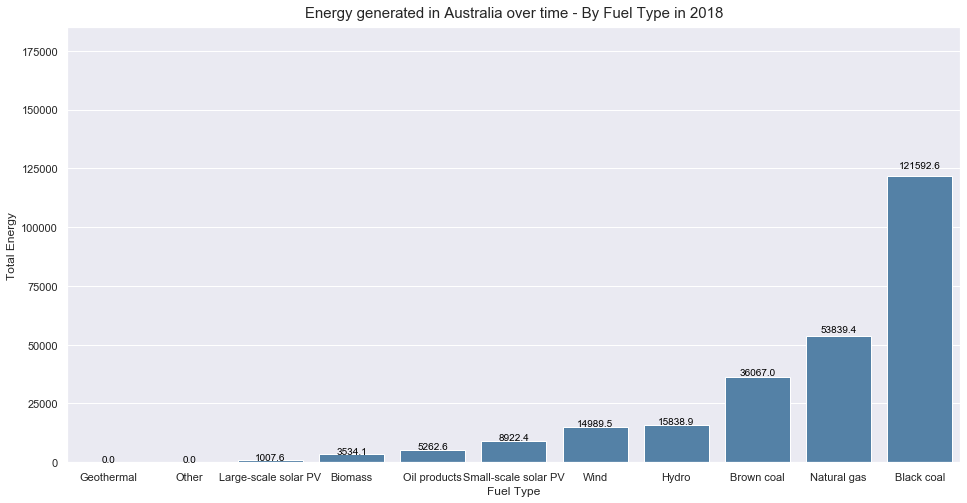

In [40]:
#---------------------------------------Plotting data using seaborn----------------------------
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Energy generated in Australia over time - By Fuel Type in 2018', fontsize=15, pad=10) 
#---------------------Title of the chart

plt.ylim(0, 185000) #------------------------Setting Range for Y Axis

g=sns.barplot(summ_energy_fuel_type['Fuel_Type'],summ_energy_fuel_type['Total_Energy'],color="steelblue"); #------ replace line plot with bar plot

ax.set(xlabel='Fuel Type', ylabel='Total Energy'); #------------------------Changing Labels of x and y axis


for index, row in summ_energy_fuel_type.iterrows():
    g.text(row.name,row.Total_Energy*1.03, round(row.Total_Energy,1), color='black', ha="center")
    

plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Non-renewable fuel types like Black coal, Brown coal & Natural gas the top three sources of energy generation in Australia

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.b) Which state had the highest energy production in 2018? What is the ratio (percentage breakdown) of renewable vs non-renewable energy production for that state in 2018 </font>

------------------------------------------------------------------------------------------------------------------------------

In [41]:
#------------------------------Summarizing Total energy by State (Data already filtered for 2018)--------------------------------

summ_energy_state=comined_energy_data_2018.groupby(['State']\
                                            ).agg(Total_Energy=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Total_Energy'],ascending=False)

#------------------------------Summarizing Renewable energy by State (Data already filtered for 2018)----------------------

summ_energy_state_ren=comined_energy_data_2018[comined_energy_data_2018['Category']=='Renewable fuels'].groupby(['State']\
                                            ).agg(Total_Energy_Renewable=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Total_Energy_Renewable'],ascending=False)

#------------------------------Summarizing Non-Renewable energy by State (Data already filtered for 2018)----------------------

summ_energy_state_nonren=comined_energy_data_2018[comined_energy_data_2018['Category']=='Non-renewable fuels'].groupby(['State']\
                                            ).agg(Total_Energy_NoNRenewable=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Total_Energy_NoNRenewable'],ascending=False)

#------------------------------Merging data frames into one column----------------------
summ_energey_comb_imd=pd.merge(summ_energy_state,summ_energy_state_ren,on="State")
summ_energey_comb=pd.merge(summ_energey_comb_imd,summ_energy_state_nonren,on="State")


#------------------------------Calculating Ratio/Percentage of Renewable vs Non-Renewable Energy----------------------
summ_energey_comb['Renewable%']=((summ_energey_comb['Total_Energy_Renewable']/\
                                 summ_energey_comb['Total_Energy'])*100).round(1).astype(str)+'%'

summ_energey_comb['Non-Renewable%']=((summ_energey_comb['Total_Energy_NoNRenewable']/\
                                 summ_energey_comb['Total_Energy'])*100).round(1).astype(str)+'%'

summ_energey_comb.head(10)

,State,Total_Energy,Total_Energy_Renewable,Total_Energy_NoNRenewable,Renewable%,Non-Renewable%
0,NSW,71860.0,11253.5,60606.5,15.7%,84.3%
1,QLD,70646.5,5052.3,65594.2,7.2%,92.8%
2,VIC,47323.1,7191.9,40131.2,15.2%,84.8%
3,WA,41395.6,3205.9,38189.7,7.7%,92.3%
4,SA,14692.8,6851.8,7841.0,46.6%,53.4%
5,TAS,11623.5,10613.7,1009.8,91.3%,8.7%
6,NT,3512.6,123.4,3389.2,3.5%,96.5%


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. NSW had the highest energy production in 2018
2. 15.7% of the energy produced was using Renewable fuels whereas 84.3% of the energy produced was using Non-renewable fuels

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1.c) Draw a plot showing the percentage of energy generation from renewable energy
sources for each state over the period 2009 to 2018. From your graph, which state do you think is making the most progress towards adopting green energy? Provide a reason for your answer. </font>

------------------------------------------------------------------------------------------------------------------------------

In [42]:
#------------------------------Summarizing Total energy by State (Renewable Energy Only)--------------------------------

summ_energy_state_yr=combined_energy_data[combined_energy_data['Category']=='Renewable fuels'].groupby(['Year','State']\
                                            ).agg(Total_Energy_Renew=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Year'],ascending=True)

#------------------------------Summarizing Total energy by State (Renewable Energy + Non-renewable Energy)--------------------------------

summ_energy_state_yr_all=combined_energy_data.groupby(['Year','State']\
                                            ).agg(Total_Energy_All=('Energy','sum')\
                                                 ).reset_index().sort_values(by=['Year'],ascending=True)

#------------------------------Combining datasets to get both energy metrics----------------------------------

merge_data_energy=pd.merge(summ_energy_state_yr,summ_energy_state_yr_all,on=['State','Year'],how="inner")

#------------------------------Calculating Percentages---------------------------------------------------
merge_data_energy['Per_Ren_Energy']=round((merge_data_energy['Total_Energy_Renew']/merge_data_energy['Total_Energy_All']),3)

#merge_data_energy=merge_data_energy[merge_data_energy['State']=='TAS']

merge_data_energy.sort_values(by=['Year','State'],inplace=True)

merge_data_energy['row_num'] = np.arange(len(merge_data_energy))
merge_data_energy.set_index('row_num',inplace=True)

merge_data_energy.head()

,Year,State,Total_Energy_Renew,Total_Energy_All,Per_Ren_Energy
row_num,,,,,
0,2009,NSW,3926.0,74382.7,0.053
1,2009,NT,9.7,2922.4,0.003
2,2009,QLD,2487.3,64029.9,0.039
3,2009,SA,2133.8,14793.2,0.144
4,2009,TAS,7827.4,8597.2,0.910


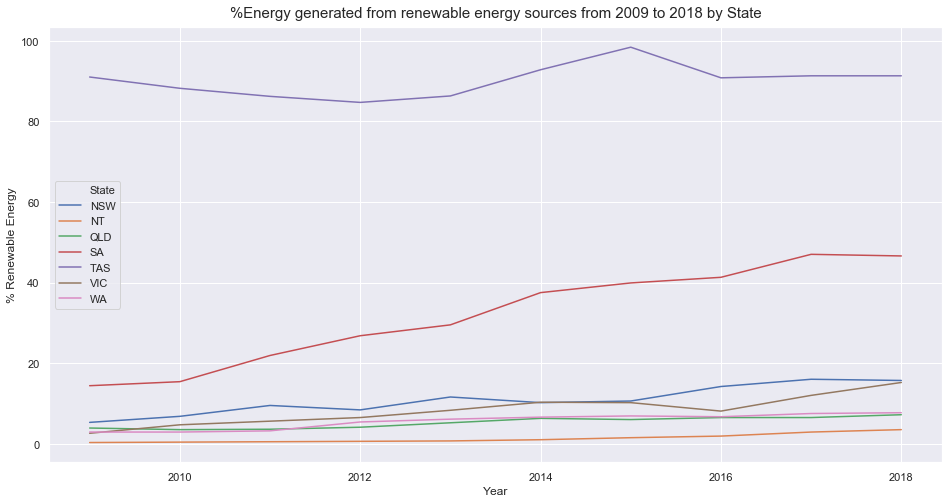

In [43]:

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('%Energy generated from renewable energy sources from 2009 to 2018 by State', fontsize=15, pad=10) 
#---------------------Title of the chart


sns.lineplot(x=merge_data_energy['Year'],y=round(merge_data_energy['Per_Ren_Energy']*100,1),hue=summ_energy_state_yr['State']);


ax.set(xlabel='Year', ylabel='% Renewable Energy');

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. SA (South Australia) is making the most progress towards adopting green energy. In 2009 almost 14% of the energy was produced using a renewable resource and in 2018 the percentage of renewable energy increased to almost 50%
2. TA (Tasmania) has the highest usage of green energy among all the states

####  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000055"> A3. Visualising the Relationship over Time:

Now let's look at the relationship between all variables impacting the energy generation over time.
Ensure that you have combined all the data from the different states. Ensure that your data is
aggregated by year, state, the total energy produced (total_production), and has a separate column for
each of the fuel types.
<font color=darkblue>
&nbsp;

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1. Use Python to build a Motion Chart, that visualises the energy production trend for Australia over time. The motion chart should show the units of energy production using Wind on the x-axis, the energy production using Natural gas on the y-axis, the colour represents the states/territories the bubble size should show the total_production. (HINT: A Jupyter notebook containing a tutorial on building motion charts in Python is available here ) </font>

------------------------------------------------------------------------------------------------------------------------------

In [44]:
#---------------------------------Calculating total energry produced by Wind and Natural Gas separately-------------------------

#---------------------------------Total energy by States------------------------------------------------------------------------
summ_energy_st=combined_energy_data.groupby(['State','Year']).agg(Total_Energy=('Energy','sum')).reset_index()

#--------------------------------Total energy for Wind by States----------------------------------------------------------------

summ_energy_state_wind=combined_energy_data[combined_energy_data['Fuel_Type']=='Wind'].groupby(['State', 'Year']\
                                            ).agg(Wind_Energy=('Energy','sum')).reset_index()

#--------------------------------Total energy for Natural Gas by States---------------------------------------------------------------

summ_energy_state_ng=combined_energy_data[combined_energy_data['Fuel_Type']=='Natural gas'].groupby(['State','Year']\
                                            ).agg(NG_Energy=('Energy','sum')).reset_index()

#--------------------------------Combining data: Wind/Natural Gas and Total Production---------------------------------------------------------------

summ_energy_tot_wind=pd.merge(summ_energy_st,summ_energy_state_wind,on=["State","Year"])
summ_energy_all=pd.merge(summ_energy_tot_wind,summ_energy_state_ng,on=["State","Year"])

display(summ_energy_all.head(10))


,State,Year,Total_Energy,Wind_Energy,NG_Energy
0,NSW,2009,74382.7,41.3,2445.1
1,NSW,2010,74632.7,432.5,4681.3
2,NSW,2011,72739.1,530.1,4742.7
3,NSW,2012,70678.3,697.6,4212.1
4,NSW,2013,70338.8,832.6,5168.7
5,NSW,2014,68488.6,899.2,5528.3
6,NSW,2015,64159.2,1376.0,4528.4
7,NSW,2016,70250.1,1898.8,4628.6
8,NSW,2017,71007.7,1872.0,3330.8
9,NSW,2018,71860.0,2448.7,3039.5


In [45]:
import plotly.express as px
from motionchart.motionchart import MotionChart

In [46]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [47]:
#---------------------------------------Creating the motion chart----------------------------------------------
mChart = MotionChart(df = summ_energy_all, key='Year', x='Wind_Energy', y='NG_Energy', xscale='linear', yscale='linear',
                     size='Total_Energy', color='State', title="Energy Production by States", width=900, height=700)

mChart.to_notebook()


In [48]:
#------------------------------------------This is for creating the final report-------------------------------------------
# from IPython.display import Image
# Image("motion chart.png")

Reference:

pydoc.net. (n.d.). Python motionchart package v0.3, motionchart.motionchart module source code :: PyDoc.net. [online] Available at: https://pydoc.net/motionchart/0.3/motionchart.motionchart/ [Accessed 25 April 2020].

‌

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">2. Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set the timer bar next to the play/pause button to the minimum value.) And then answer the following
questions:</font>

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">2a. Comment generally on the trend you see on reliance on wind energy vs reliance on
natural gas for each Australian state overtime. Is it logical to say if there is a relationship between the two variables?</font>

-------------------------------------------------------------------------------------------------------------------------------
Findings:

Wind Energy:

1. New South Wales (NSW), South Australia (SA), Tasmania (TAS), Victoria (VA), Western Australia (WA) have increased their reliance on Wind Energy
2. Northern Territory (NT) doesn't harness Wind Energy at all
3. Use of Wind Energy in Queensland (QA) is flat over the years and minimal of all States currently using Wind Energy

Natural Gas:

1. New South Wales (NSW), Queensland (QLD) and Tasmania (TAS) have shown a decrease in their reliance on Natural Gas over the years
2. Victoria (VA) and Western Australia (WA) have increased their reliance on Natural Gas
3. Northern Territory (NT) & Southern Australia (SA) didn't show much change in their reliance on Natural Gas over the years

Relationship between Wind Energy vs. Natural Gas:

1. The relationship differs from State to State, but in general for most of the States where reliance on Wind Energy increased, a drop or unchanged increase in reliance on Natural Gas is observed
    - The Pearson correlation matrix below validates the same


In [49]:
correlation_plot_check=summ_energy_all[["State","Wind_Energy","NG_Energy"]].copy()

display('State: VIC',correlation_plot_check[correlation_plot_check["State"]=="VIC"].corr())

display('State: TAS',correlation_plot_check[correlation_plot_check["State"]=="TAS"].corr())

display('State: SA',correlation_plot_check[correlation_plot_check["State"]=="SA"].corr())

display('State: NT',correlation_plot_check[correlation_plot_check["State"]=="NT"].corr())

display('State: QLD',correlation_plot_check[correlation_plot_check["State"]=="QLD"].corr())

display('State: NSW',correlation_plot_check[correlation_plot_check["State"]=="WA"].corr())

display('State: WA',correlation_plot_check[correlation_plot_check["State"]=="WA"].corr())

'State: VIC'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,0.720167
NG_Energy,0.720167,1.000000


'State: TAS'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,-0.638528
NG_Energy,-0.638528,1.000000


'State: SA'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,-0.312175
NG_Energy,-0.312175,1.000000


'State: NT'

,Wind_Energy,NG_Energy
Wind_Energy,NaN,NaN
NG_Energy,NaN,1.0


'State: QLD'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,0.526924
NG_Energy,0.526924,1.000000


'State: NSW'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,0.828721
NG_Energy,0.828721,1.000000


'State: WA'

,Wind_Energy,NG_Energy
Wind_Energy,1.000000,0.828721
NG_Energy,0.828721,1.000000


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">2b. Which state relied most on natural gas for energy production in 2013? Please support your answer with any relevant python code and the motion chart screenshot.</font>

In [50]:
#-------------------------------Using Dataset created in the above question to calculate % Energy from Natural Gas-------
summ_energy_NG_2013=summ_energy_all[summ_energy_all['Year']==2013]
summ_energy_NG_2013['Per']=summ_energy_NG_2013['NG_Energy']/summ_energy_NG_2013['Total_Energy']

summ_energy_NG_2013['Per_Formated']=round(summ_energy_NG_2013['NG_Energy']/summ_energy_NG_2013['Total_Energy']*100,1).astype(str)+"%"
display(summ_energy_NG_2013.head(7))

display(summ_energy_NG_2013[summ_energy_NG_2013['NG_Energy']==summ_energy_NG_2013['NG_Energy'].max()])


,State,Year,Total_Energy,Wind_Energy,NG_Energy,Per,Per_Formated
4,NSW,2013,70338.8,832.6,5168.7,0.073483,7.3%
14,NT,2013,3314.4,0.0,2269.0,0.684588,68.5%
24,QLD,2013,62686.6,30.7,13909.5,0.221890,22.2%
34,SA,2013,13398.5,3313.5,7060.9,0.526992,52.7%
44,TAS,2013,13121.6,477.5,1752.5,0.133558,13.4%
54,VIC,2013,52946.6,2005.1,3247.7,0.061339,6.1%
64,WA,2013,33902.1,1300.2,17645.1,0.520472,52.0%


,State,Year,Total_Energy,Wind_Energy,NG_Energy,Per,Per_Formated
64,WA,2013,33902.1,1300.2,17645.1,0.520472,52.0%


In [51]:
#------------------------------------------This is for creating the final report-------------------------------------------
# from IPython.display import Image
# Image("2013.png")

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Western Australia (WA) relied most on natural gas for energy production in 2013

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">2c. Comment on Queensland (QLD) states reliance trend on Natural gas between 2009 to
2018? What could be the reason contributing to this?</font>

In [52]:
#---------------------------------Looking at Queensland's reliance on Natural Gas--------------------------------------
summ_energy_QLD=summ_energy_all[summ_energy_all['State']=='QLD']

summ_energy_QLD['Per_NG']=summ_energy_QLD['NG_Energy']/summ_energy_QLD['Total_Energy']*100

summ_energy_QLD['row_num'] = np.arange(len(summ_energy_QLD))

summ_energy_QLD.set_index('row_num',inplace=True)

summ_energy_QLD.head()

,State,Year,Total_Energy,Wind_Energy,NG_Energy,Per_NG
row_num,,,,,,
0,QLD,2009,64029.9,27.3,9257.2,14.457621
1,QLD,2010,65404.4,30.9,12020.6,18.378886
2,QLD,2011,64186.7,27.3,14595.3,22.738823
3,QLD,2012,63678.9,27.7,15303.4,24.032136
4,QLD,2013,62686.6,30.7,13909.5,22.188953


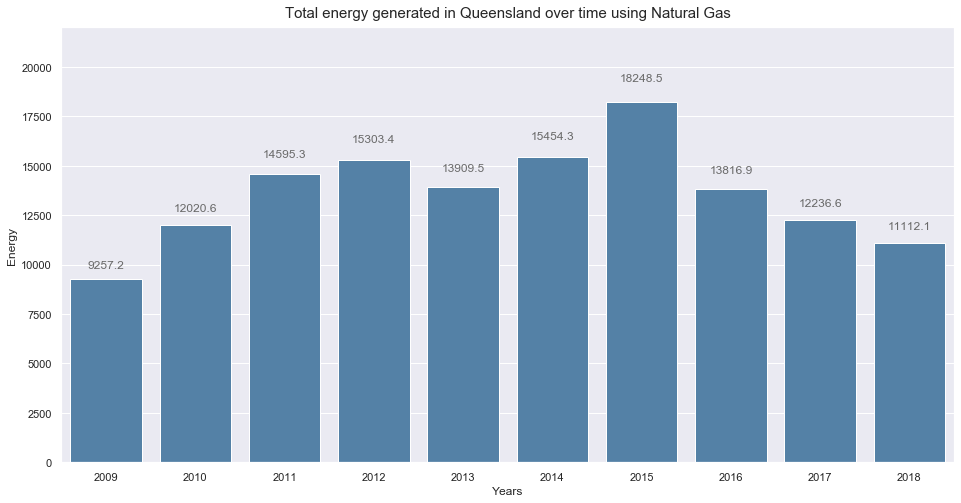

In [53]:
#---------------------------------------Plotting data using seaborn----------------------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Total energy generated in Queensland over time using Natural Gas',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 22000) #------------------------Setting Range for Y Axis

g=sns.barplot(summ_energy_QLD['Year'],summ_energy_QLD['NG_Energy'],color="steelblue"); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='Energy'); #------------------------Changing Labels of x and y axis


for index, row in summ_energy_QLD.iterrows():
    g.text(row.name,row.NG_Energy*1.05, round(row.NG_Energy,2), fontsize=12, color='dimgrey', ha="center", va="bottom")
    

plt.show()

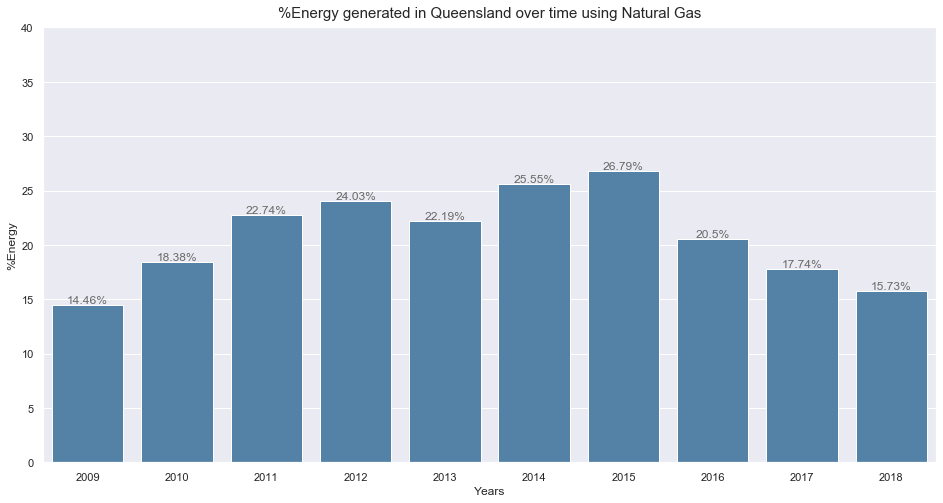

In [54]:
#---------------------------------------Plotting data using seaborn----------------------------

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('%Energy generated in Queensland over time using Natural Gas',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 40) #------------------------Setting Range for Y Axis

g=sns.barplot(summ_energy_QLD['Year'],summ_energy_QLD['Per_NG'],color="steelblue"); #------ replace line plot with bar plot

ax.set(xlabel='Years', ylabel='%Energy'); #------------------------Changing Labels of x and y axis


for index, row in summ_energy_QLD.iterrows():
    g.text(row.name,row.Per_NG, str(round(row.Per_NG,2))+"%", fontsize=12, color='dimgrey', ha="center", va="bottom")
    

plt.show()

Findings:

1. Queensland's reliance on natural gas for energy production increased till 2015 then saw a significant drop in the following years

Insights:
1. Cost of distribution of Natural Gas is higher in Queensland as it is not used widely in household hence we see a drop in recent years
2. EnergyQuest’s East Coast Gas Outlook to 2036 report shows that gas production in NSW, Victoria, South Australia and Tasmania will be less than demand and hence Queensland will need to increase it's supply by almost one-third to meet the demand. This might bring down the usage in the State itself
3. Queensland also adopted the usage of small scale solar PV thus bringing down the reliance on Natural Gas

Reference:

1. Lovell, J. (2019). EnergyQuest’s East Coast Gas Outlook to 2036. [online] Australian Energy Council. Available at: https://www.energycouncil.com.au/analysis/energyquest-s-east-coast-gas-outlook-to-2036/ [Accessed 21 Apr 2020].

‌
2. Wordsworth, M. (2018). Queensland piped gas most expensive in Australia, review reveals - ABC News. [online] www.abc.net.au. Available at: https://www.abc.net.au/news/2018-02-27/queensland-most-expensive-state-in-the-nation-for-household-gas/9489964 [Accessed 21 Apr 2020].

‌

###  <span style="font-family: Calibri; font-weight:bold;font-size:1.5em;color:#000055"> Problem Context:

    
In this task, you are presented with some pre-processed tweets about bushfires in Australia. The dataset
is available via the following link:
https://lms.monash.edu/mod/folder/view.php?id=6720926 > twitter_data.csv

Please refer to Table 1 if you want to know the meaning of each feature/column. For example, nFollows
shows the number of followers a user has. A user which has more than a thousand followers can be
considered as a popular user . It should be noted that NOT every tweet in the data set is relevant to the
bushfires in Australia, as represented by the value in the last column (1 denotes relevant and 0
irrelevant tweet)

###  <span style="font-family: Calibri; font-weight:bold;font-size:1.5em;color:#000055"> Field Description:
  
1. text_score: Retrieval Score (based on some IR Models)
2. text_score_expansion: Retrieval Score using expansion on topic
3. hashtag: If the tweet contains hashtag(s)
4. hasURL: If the tweet contains URLs
5. isReply: If the tweet is a reply to another tweet
6. length: The length (in characters) of the tweet
7. tweet_topic_time_diff: The time difference between the tweet and the query
8. semant_ic_overlap: Overlap of named entities between the topic and the tweet
9. #entityTypes: #types of Named-Entities (NE) extracted from the tweet
10. #entities: #NEs extracted from tweet
11. organization_entities: #NEs with type of Organization extracted from tweet
12. person_entities: #NEs with type of Person extracted from tweet
13. work_entities: #NEs with type of Work extracted from tweet
14. event_entities: #NEs with type of Event extracted from tweet
15. species_entities: #NEs with type of Species extracted from tweet
16. places_entities: #NEs with type of Places extracted from tweet
17. nFollowers: #followers that the author has
18. Friends: #followees that the author has
19. nFavorties: How many times has the tweets been marked as favorite by others?
20. nListed: How many lists has the author been listed in?
21. isVerified: Whether the tweet is posted by a verified account or not?
22. isGeoEnabled: Is there a geolocation attached to this tweet?
23. twitterAge: How many years has been since the author signed up on Twitter?
24. #tweetsPosted: How many tweets has the author posted on Twitter?
25. relevanceJudge: Whether the tweet is relevant or not to the topic?

####  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000055"> B1. Investigating the Data:

Please make sure to understand the data set and it’s variables properly before answering the following questions. You need to have a good insight into the dataset to be able to understand some of the questions properly and avoid confusion.
<font color=darkblue>
&nbsp;

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">1. How many tweets are there all together in the data file? How many of these tweets were posted from a verified account?</font>

------------------------------------------------------------------------------------------------------------------------------

In [55]:
#---------------------------------------------Reading twitter data from local-------------------------------------------------
data_twitter_feed=pd.read_csv('D:/Introduction to Data Science/Assignment/Datasets-20200413/twitter_data.csv')
data_twitter_feed.rename(columns = {'#entityTypes':'entityTypes', '#entities':'entities', '#tweetsPosted':'tweetsPosted'}, \
                         inplace = True)
display(data_twitter_feed.head())
print(data_twitter_feed.shape)

,text_score,text_score_expansion,hashtag,hasURL,isReply,length,tweet_topic_time_diff,semantic_overlap,entityTypes,entities,...,places_entities,nFollowers,nFriends,nFavorties,nListed,isVerified,isGeoEnabled,twitterAge,tweetsPosted,relevanceJudge
0,-9.06819,-7.60786,0,1,0,116,1,0,1,3,...,1,7212,240,4,248,0,0,2.999663,13491,0
1,-9.20394,-7.70955,0,1,1,100,3,0,2,4,...,0,358,343,4,1,0,0,2.078992,2385,0
2,-9.19799,-7.70508,1,1,0,49,0,0,0,1,...,0,482,19,1,33,0,0,1.400101,172608,0
3,-16.00000,-16.00000,0,1,0,71,16,0,0,3,...,0,17,20,0,0,0,0,2.512816,3101,0
4,-16.00000,-16.00000,0,1,0,14,15,0,0,0,...,0,376,618,102,5,0,0,2.601267,1192,0


(39955, 25)


In [56]:
#--------------------------------Every record in this dataset is a tweet----------------------------------------------
print('Total Tweets in the Dataset:',data_twitter_feed['text_score'].count())
print('Total Tweets in the Dataset from a verified account:',\
      data_twitter_feed[data_twitter_feed['isVerified']==1].text_score.count())

Total Tweets in the Dataset: 39955
Total Tweets in the Dataset from a verified account: 218


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. 39,955 tweets are there in the dataset
2. Only 218 of these tweets were posted from a verified account

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">2. Draw a histogram showing the distribution of #entities extracted from the tweets. Set an appropriate bin size to present this information.</font>

------------------------------------------------------------------------------------------------------------------------------

In [57]:
#---------------------------------------Getting minimum and maximum entites to decide the bin-----------------------
print('Min Entities:',data_twitter_feed['entities'].min())
print('Max Entities:',data_twitter_feed['entities'].max())

Min Entities: 0
Max Entities: 11


In [58]:
import numpy as np

In [59]:
#---------------------------------------Creating counts for plotting in Histogram using numpy-----------------------------------
count_entities=np.histogram(data_twitter_feed['entities'],bins=11)
inter=list(count_entities)
inter1=list(inter[0])
inter1

[10421, 8137, 8116, 6109, 3917, 1962, 853, 296, 104, 26, 14]

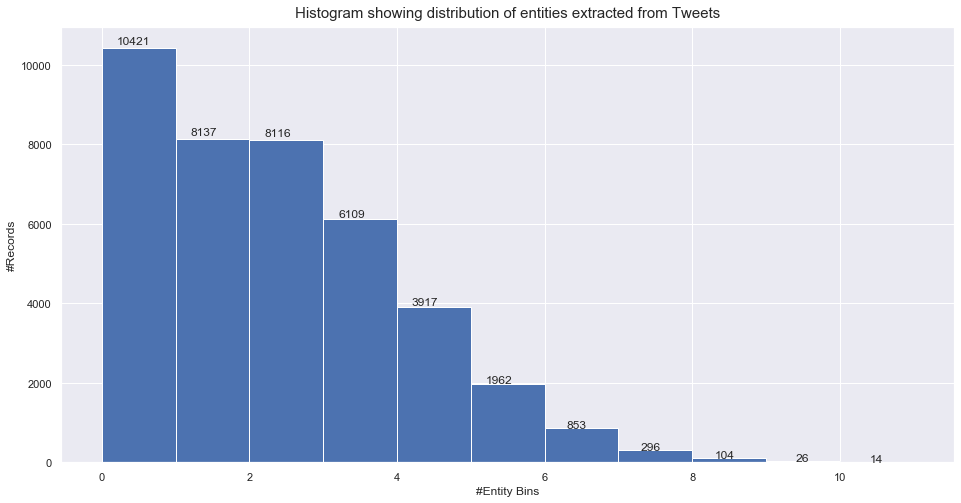

In [60]:

fig, ax = plt.subplots(figsize=(16,8)); #---------------------Setting size of the plot

plt.title("Histogram showing distribution of entities extracted from Tweets",fontsize=15, pad=10);

plt.hist(data_twitter_feed['entities'], bins=11);

ax.set(xlabel='#Entity Bins', ylabel='#Records');

pos_x=[0.2,1.2,2.2,3.2,4.2,5.2,6.3,7.3,8.3,9.4,10.4,11.4] #----------declaring a list to get data points to be used in plt.text

y=0

for i in range(len(inter1)):
      plt.text(x = pos_x[y] , y = inter1[i]*1.01, s = inter1[i], size = 12)
      y+=1  



------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">3. Compute the descriptive statistics (mean, std, quartile1, median, quartile3 and max ) of #entities of relevant (ie. relevanceJudge = 1) and non-relevant (ie. with relevanceJudge = 0) tweets in the dataset. (Hint: You may use the describe() function for simplicity). Explain any interesting findings.</font>

------------------------------------------------------------------------------------------------------------------------------

In [61]:
print("Descriptive statistics for relevant tweets:")
display(pd.DataFrame(data_twitter_feed[data_twitter_feed['relevanceJudge']==1].entities.describe().round(1)))

print("Descriptive statistics for non-relevant tweets:")
display(pd.DataFrame(data_twitter_feed[data_twitter_feed['relevanceJudge']==0].entities.describe().round(1)))

print("Percentile value for non-relevant tweets", \
      data_twitter_feed[data_twitter_feed['relevanceJudge']==0].entities.quantile(0.275))


Descriptive statistics for relevant tweets:


,entities
count,2817.0
mean,2.4
std,1.6
min,0.0
25%,1.0
50%,2.0
75%,3.0
max,10.0


Descriptive statistics for non-relevant tweets:


,entities
count,37138.0
mean,1.9
std,1.7
min,0.0
25%,0.0
50%,2.0
75%,3.0
max,11.0


Percentile value for non-relevant tweets 1.0


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. The average number of Named Entities in relevant tweets (approx 2.4) is higher than that present in non-relevant tweets (approx 1.9)
2. The spread of Entity information is similar for both relevant and non-relevant tweets (standard deviation of 1.6 and 1.7 respectively)
3. More than 50% of the tweets have similar entity counts irrespective of them being relevant or non-relevant (Percentile values 50% & 70%)
4. However 75% of the relevant tweets have at-least one entity (Percentile: 25%) whereas the figure is slightly lower for non-relevant tweets, 72.5% of the non-relevant tweets have at-least one entity

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">4. What is the average length of the tweets (in characters) that are judged as relevant? What is the average length of a non-relevant tweet?</font>

------------------------------------------------------------------------------------------------------------------------------

In [62]:
print("Average length of relevant tweets (in characters):")
display(int(data_twitter_feed[data_twitter_feed['relevanceJudge']==1].length.mean()))

print("Average length of non-relevant tweets (in characters):")
display(int(data_twitter_feed[data_twitter_feed['relevanceJudge']==0].length.mean()))


Average length of relevant tweets (in characters):


90

Average length of non-relevant tweets (in characters):


87

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Average length of relevant tweets is 90
2. Average length of non-relevant tweets is 87

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5. To gain further insights into the twitter age of the users, it would be better to group the twitterAge in categorical bins. Create a new column twitter age group in your dataframe based on twitterAge by converting it into the following groupings or categories [‘0-1’,’1-2’,’2-3’,’3-4’, ‘4-5’, ‘5+’] ( Hint: You can use the cut() method to bin (categorise) your data in these suggested categories)</font>

------------------------------------------------------------------------------------------------------------------------------

In [63]:
#----------------------------------------------Getting minimum and maximum years since-----------------------------------------
#----------------------------------------------an author signed up in twitter--------------------------------------------------

print(data_twitter_feed['twitterAge'].min())
print(data_twitter_feed['twitterAge'].max())

twitter_data_feed_upd=data_twitter_feed

0.0
5.623593


In [64]:
#----------------------------------------Creating age bins for the analysis. Remember entries in age_bins-----------------------
#----------------------------------------Should be 1 greater than age_labels----------------------------------------------------
age_labels = ['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5+']
age_bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
twitter_data_feed_upd['twitter_age_group'] = pd.cut(twitter_data_feed_upd['twitterAge'], bins=age_bins, labels=age_labels, include_lowest=True)

In [65]:
twitter_data_feed_upd[twitter_data_feed_upd['twitterAge']<1].head()

,text_score,text_score_expansion,hashtag,hasURL,isReply,length,tweet_topic_time_diff,semantic_overlap,entityTypes,entities,...,nFollowers,nFriends,nFavorties,nListed,isVerified,isGeoEnabled,twitterAge,tweetsPosted,relevanceJudge,twitter_age_group
52,-8.92596,-7.49843,0,1,0,105,0,0,0,2,...,0,0,0,0,0,0,0.0,0,0,0 - 1
96,-16.00000,-16.00000,0,1,0,93,9,0,3,3,...,0,0,0,0,0,0,0.0,0,0,0 - 1
99,-16.00000,-16.00000,0,1,0,116,1,0,1,4,...,0,0,0,0,0,0,0.0,0,0,0 - 1
155,-16.00000,-16.00000,0,1,0,110,15,0,2,3,...,0,0,0,0,0,0,0.0,0,0,0 - 1
185,-9.20315,-7.70851,0,1,0,89,5,0,2,5,...,0,0,0,0,0,0,0.0,0,0,0 - 1


In [66]:
#-------------------------------------Quality Check - If twitter age groups are binned correctly---------------------------------
age_group_summary=twitter_data_feed_upd.groupby('twitter_age_group').agg(min_age=('twitterAge','min'), max_age=('twitterAge','max'), count=('twitterAge','count'))
age_group_summary.head(7)

,min_age,max_age,count
twitter_age_group,,,
0 - 1,0.000000,0.000000,1355
1 - 2,1.056685,1.999978,15423
2 - 3,2.000199,2.999843,17140
3 - 4,3.000334,3.999696,5014
4 - 5,4.001195,4.999437,932
5+,5.001474,5.623593,91


------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5a. Generate boxplots summarising the distribution of each twitter age group against their median tweet length. What do you observe? Is there much variation in tweet length across the age groups?</font>

------------------------------------------------------------------------------------------------------------------------------

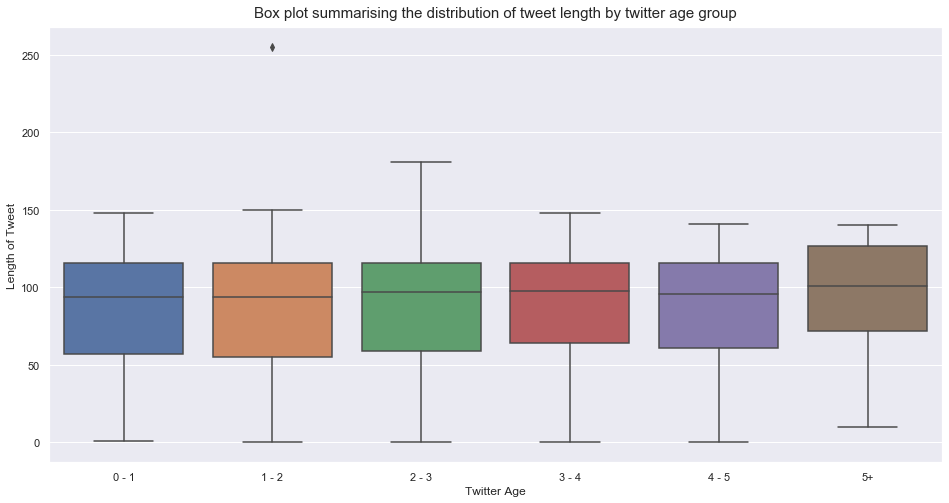

In [67]:
fig, ax = plt.subplots(figsize=(16,8)); #---------------------Setting size of the plot

plt.title("Box plot summarising the distribution of tweet length by twitter age group",fontsize=15, pad=10);

sns.boxplot('twitter_age_group','length',data=twitter_data_feed_upd);

ax.set(xlabel='Twitter Age', ylabel='Length of Tweet');

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. The median length of the tweet across different age groups are similar and falls between 90 to 100 characters (as seen from the box plot)
2. Users with 5+ number of years in twitter usually post longer tweets than the rest of the groups (median length of a tweet is higher for this group)
3. Twitter age group "1-2" have an outlier
4. A higher variation in the length of a tweet is seen for users falling under 2-3 twitter age bucket

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5b. Which age group has the lowest median tweet length and which one has the highest?
State these median values.</font>

------------------------------------------------------------------------------------------------------------------------------

In [68]:
#-------------------------------------Calculating Median length of Tweet---------------------------------
age_group_tweet_length_summ=twitter_data_feed_upd.groupby('twitter_age_group'\
                                                         ).agg(median_length=('length','median'\
                                                                             ), min_length=('length','min'),max_length=('length','max') ).reset_index()
age_group_tweet_length_summ.head(7)

,twitter_age_group,median_length,min_length,max_length
0,0 - 1,94.0,1,148
1,1 - 2,94.0,0,255
2,2 - 3,97.0,0,181
3,3 - 4,98.0,0,148
4,4 - 5,95.5,0,141
5,5+,101.0,10,140


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Groups 0-1 and 1-2 have the lowest median values, the median value is 94
2. Group 5+ have had the highest median value, the median value is 101

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5c. According to the current bushfire tweet dataset, which age group is more active on
twitter(has posted most tweets - from the current processed set tweets in your dataframe)? (Note: Each record in the dataframe is a tweet).</font>

------------------------------------------------------------------------------------------------------------------------------

In [69]:
#---------------------------------------Aggregating total tweets by twitter age group---------------------------------
age_group_activity_summ=twitter_data_feed_upd.groupby('twitter_age_group').agg(tweets_tot=('entities','count')).reset_index()

#---------------------------------------Calculating % of total tweets across twitter age group---------------------------------
age_group_activity_summ['Per_Tweets']=((age_group_activity_summ['tweets_tot']/age_group_activity_summ['tweets_tot'].sum())*100).round(1).astype(str)+"%"

age_group_activity_summ.head(7)

,twitter_age_group,tweets_tot,Per_Tweets
0,0 - 1,1355,3.4%
1,1 - 2,15423,38.6%
2,2 - 3,17140,42.9%
3,3 - 4,5014,12.5%
4,4 - 5,932,2.3%
5,5+,91,0.2%


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Users who have been using twitter for at least 2 - 3 years have posted more tweets than other age buckets
2. 42.9% of the tweets from the entire dataset is posted by users using twitter for at-least 2 - 3 years

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5d. Create a plot showing the total number of tweets posted by each age group (from Part [c] above).</font>

------------------------------------------------------------------------------------------------------------------------------

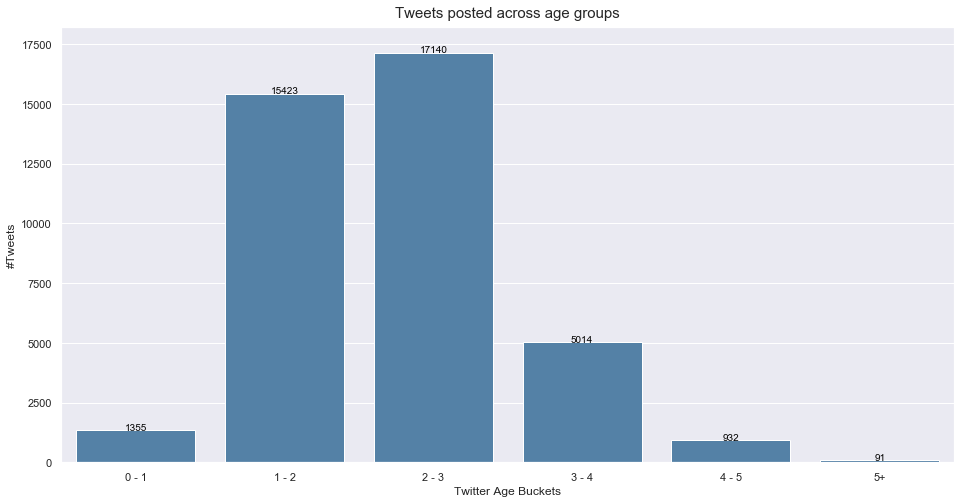

In [70]:
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Tweets posted across age groups',fontsize=15, pad=10) #---------------------Title of the chart

plt.ylim(0, 18200) #------------------------Setting Range for Y Axis

g=sns.barplot(age_group_activity_summ['twitter_age_group'],age_group_activity_summ['tweets_tot'],color="steelblue"); #------ replace line plot with bar plot


ax.set(xlabel='Twitter Age Buckets', ylabel='#Tweets'); #------------------------Changing Labels of x and y axis


for index, row in age_group_activity_summ.iterrows():
    g.text(row.name,row.tweets_tot*1.002, int(round(row.tweets_tot,0)), color='black', ha="center")
    

plt.show()

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">5e. Which age group on average has the highest number of followers on twitter?</font>

------------------------------------------------------------------------------------------------------------------------------

In [71]:
#---------------------------------------Aggregating average number of followers by twitter age group---------------------------------
age_group_followers_summ=twitter_data_feed_upd.groupby('twitter_age_group').agg(
    followers=('nFollowers','mean')).round(0).astype(int).reset_index()

age_group_followers_summ.head(7)

,twitter_age_group,followers
0,0 - 1,0
1,1 - 2,1451
2,2 - 3,3465
3,3 - 4,10420
4,4 - 5,37231
5,5+,45927


-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Users with 5+ years in twitter have the highest number of followers
2. This is in line with how social media works, higher the number of years in social media, higher the followers

####  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000055"> B2. Exploring correlation in the Data:

In this task, you are required to explore the above (twitter) dataset and report on any interesting relationship/correlations you discover amongst the tweet variables. Your analysis should form a logical story. The answer should contain visualisations (plots to represent the trend or correlation), interpretation of your findings and an example of a prediction task (using simple linear regression).
<font color=darkblue>
&nbsp;

------------------------------------------------------------------------------------------------------------------------------
<font face=Arial size=3 color="#000055">Step 1: Correlation plot to identify highly correlated variables.</font>

------------------------------------------------------------------------------------------------------------------------------

In [72]:
data_twitter_feed.corr().T

,text_score,text_score_expansion,hashtag,hasURL,isReply,length,tweet_topic_time_diff,semantic_overlap,entityTypes,entities,...,places_entities,nFollowers,nFriends,nFavorties,nListed,isVerified,isGeoEnabled,twitterAge,tweetsPosted,relevanceJudge
text_score,1.000000,0.899763,-0.023046,0.057965,-0.052949,0.021106,0.165809,0.295086,0.087415,0.089143,...,0.034797,0.012778,0.010576,0.001826,0.012911,0.007682,-0.020039,0.036903,0.007561,0.303074
text_score_expansion,0.899763,1.000000,-0.013234,0.077053,-0.065682,0.037034,0.165680,0.318799,0.107813,0.115611,...,0.068876,0.016212,0.015873,0.003642,0.016959,0.012716,-0.024382,0.038922,0.013539,0.300957
hashtag,-0.023046,-0.013234,1.000000,0.015716,-0.084197,0.110926,-0.020534,-0.005842,-0.000901,0.008894,...,0.048304,0.012826,0.018968,0.013788,0.016591,0.011922,-0.001414,0.050142,0.041781,-0.001628
hasURL,0.057965,0.077053,0.015716,1.000000,-0.365809,0.040502,0.020400,0.049157,0.069214,0.171684,...,0.093613,0.023087,0.080603,-0.018907,0.028013,0.007293,-0.109433,-0.055065,0.154559,0.143038
isReply,-0.052949,-0.065682,-0.084197,-0.365809,1.000000,-0.015881,-0.020475,-0.049406,-0.078102,-0.142640,...,-0.069752,-0.011790,-0.025840,0.007804,-0.011740,-0.008176,0.052474,0.022578,-0.060469,-0.081031
length,0.021106,0.037034,0.110926,0.040502,-0.015881,1.000000,-0.000921,0.027200,0.207461,0.396985,...,0.116082,0.004119,0.021130,0.008730,0.002535,0.009077,-0.058549,0.045236,0.023631,0.017904
tweet_topic_time_diff,0.165809,0.165680,-0.020534,0.020400,-0.020475,-0.000921,1.000000,0.081114,0.037468,0.060051,...,0.005002,0.001764,0.010961,-0.001554,-0.000462,-0.006781,-0.006850,0.008834,0.004106,0.051119
semantic_overlap,0.295086,0.318799,-0.005842,0.049157,-0.049406,0.027200,0.081114,1.000000,0.192591,0.151461,...,0.079497,0.010059,0.003668,0.005922,0.015518,0.000959,-0.001927,0.032542,-0.006275,0.221140
entityTypes,0.087415,0.107813,-0.000901,0.069214,-0.078102,0.207461,0.037468,0.192591,1.000000,0.592930,...,0.358304,0.007526,0.008668,-0.007842,0.007226,0.005256,-0.022814,0.022988,0.018046,0.066888
entities,0.089143,0.115611,0.008894,0.171684,-0.142640,0.396985,0.060051,0.151461,0.592930,1.000000,...,0.299373,0.015940,0.035027,-0.006275,0.013463,0.008417,-0.058868,0.007068,0.032838,0.072833


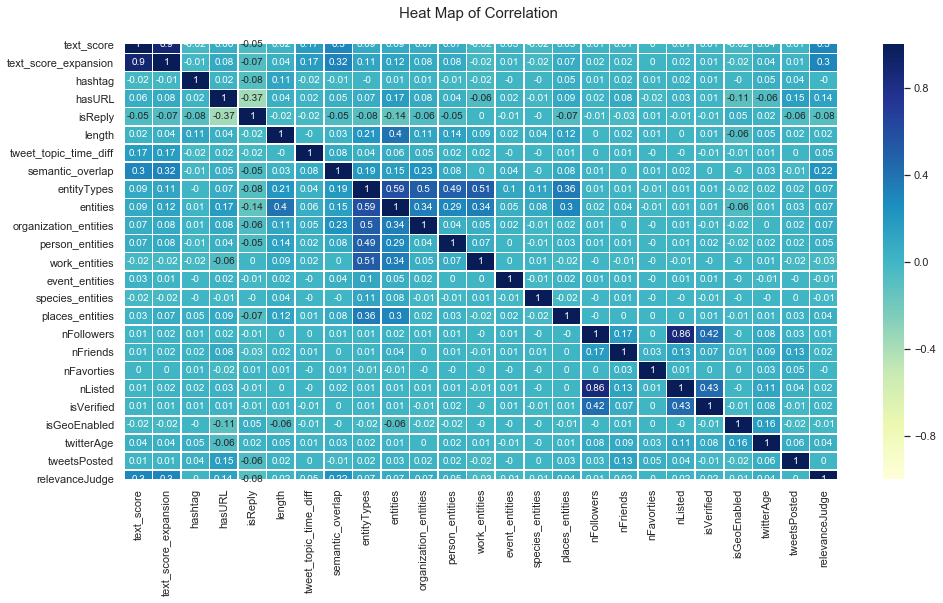

In [73]:
#---------------------------------------Getting Correlation Data----------------------------------------
corr_twitter_data = data_twitter_feed.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(corr_twitter_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

-------------------------------------------------------------------------------------------------------------------------------
Findings:

1. Variables text_score & text_score_expansion are positively correlated and the degree of association is high
    - Both the variables signify Retrieval Score hence the possibility of them being highly correlated is higher
    

2. Variables nFollwers (number of followers of the author) & nListed (the number of list the author has been listed in) are highly correlated and have a higher degree of association
    * Number of followers, in general, depends on the number of list an author has been listed in
    

3. Variables entityTypes, entities, organization_entities, person_entities, work_entities and place_entities are highly correlated
    - Since variables organization_entities, person_entities, work_entities and place entities are a subset of entities hence these variables are highly correlated
    

4. Variables isVerified & nFollowers are highly correlated and displays positive correlation, i.e. verified accounts have a higher number of followers


5. length of the tweet is correlated with entities

In [74]:
#----------------------------------------Quality Check: entities=sum of sub entities defined in the data---------------------
data_twitter_feed['entities'].sum()==(data_twitter_feed['event_entities'].sum()+data_twitter_feed['species_entities'].sum()+
                                        data_twitter_feed['places_entities'].sum()+
                                        data_twitter_feed['organization_entities'].sum() +
                                        data_twitter_feed['person_entities'].sum()+
                                        data_twitter_feed['work_entities'].sum())

False

In [75]:
#---------------------------------------dropping non correlated and categorical variables--------------------------------------------
#---------------------------------------Although few of the sub entities are not correlated, we will retain only entites column
data_twitter_upd=data_twitter_feed.drop(['text_score_expansion', 'entityTypes', 'organization_entities'\
                                        ,'person_entities','work_entities','places_entities','event_entities'\
                                         ,'species_entities', 'places_entities','isVerified',\
                                        'isGeoEnabled','hashtag','hasURL','isReply','twitter_age_group'\
                                        , 'relevanceJudge', 'tweet_topic_time_diff', 'semantic_overlap', 'twitterAge'], axis=1)
data_twitter_upd.head()

,text_score,length,entities,nFollowers,nFriends,nFavorties,nListed,tweetsPosted
0,-9.06819,116,3,7212,240,4,248,13491
1,-9.20394,100,4,358,343,4,1,2385
2,-9.19799,49,1,482,19,1,33,172608
3,-16.00000,71,3,17,20,0,0,3101
4,-16.00000,14,0,376,618,102,5,1192


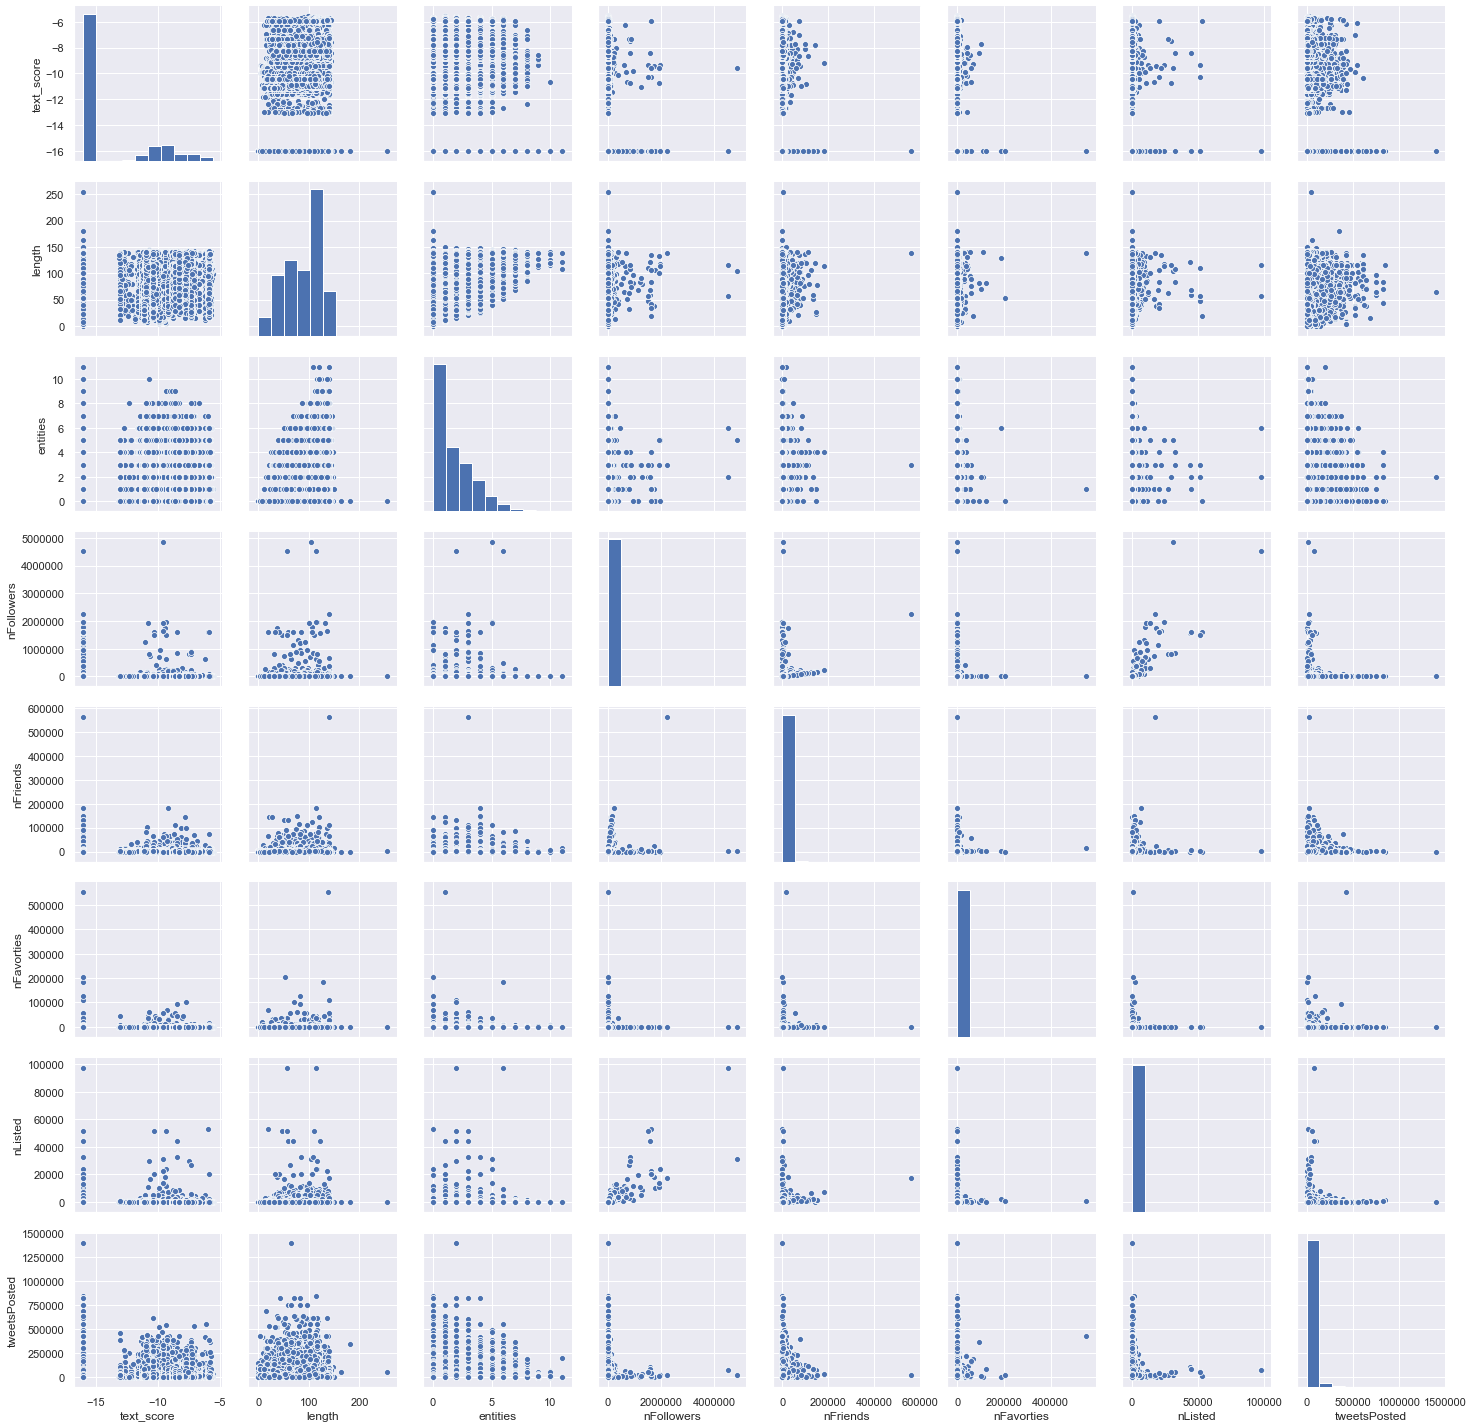

In [76]:
#---------------------------------------Using pairplot to understand the relationship between variables-------------------
sns.pairplot(data_twitter_upd);

Findings:

1. The pairplot suggests that there is a linear trend between nFollowers (number of followers in twitter) and nListed(number of List the user is a part of)
2. Also correlation value between these two entities is high, unlike other highly correlated variables where an association is possible because they represent or are a subpart of similar metrics

Building a Simple Regression Model between nFollowers and nListed. Trying to predict the nListed using nFollower attribute

In [77]:
#-------------------------------------Building regression model-------------------------------------
#-------------------------------------Listed is the dependent variable here-------------------------------------
Listed = data_twitter_upd[['nListed']]

#-------------------------------------Followers is the independent variable here-------------------------------------
Followers = data_twitter_upd[['nFollowers']]

In [78]:
#-------------------------------------Train:Test (70:30) Split-------------------------------------
Listed_train, Listed_test, Followers_train, Followers_test = train_test_split(Listed, Followers, test_size=0.30, random_state=1)


Reference:

Scikit-learn.org. (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [79]:
#-------------------------------------Running the model------------------------------
lr_model = LinearRegression()
lr_model.fit(Followers_train,Listed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#-------------------------------------Getting model parameters------------------------------
print("Value of slope (m):", lr_model.coef_[0])

intercept = lr_model.intercept_[0]
print("Intercept (c):", intercept)

Value of slope (m): [0.01654742]
Intercept (c): 38.00312412600837


In [81]:
#------------------------------------Getting R-square to determine goodness of fit using test data----------------------------
print("R - square value for Training data:", lr_model.score(Followers_train,Listed_train).round(5))

#-----------------------------------Importing necessary functions from sklearn-------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#-----------------------------------Making Prediction for test years----------------------------------------------------------- 
pred_listed=lr_model.predict(Followers_test)

print("R - square value for Test/Validation data:", round(r2_score(pred_listed, Listed_test),5))

R - square value for Training data: 0.71106
R - square value for Test/Validation data: 0.71836


So the equation is:
Listed = 0.01654742 * Followers + 38.00312412600837

Reference:

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, [online] 12(Oct), pp.2825–2830. Available at: http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.

In [82]:
#-------------------------------------------Analyzing Regression Summary----------------------------------------------
import statsmodels.api as sm

import statsmodels.formula.api as smf

FOLLOW = sm.add_constant(Followers_train) # sm.OLS by default does not add an intercept in the model

lr_model_check= sm.OLS(Listed_train,FOLLOW).fit()

#-----------------------------------------Model Statistics--------------------------------------------------------------
print(lr_model_check.summary())

                            OLS Regression Results                            
Dep. Variable:                nListed   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                 6.882e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        16:51:38   Log-Likelihood:            -2.2082e+05
No. Observations:               27968   AIC:                         4.416e+05
Df Residuals:                   27966   BIC:                         4.417e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0031      3.894      9.760      0.0

Plot of error terms

Reference:
1. Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
2. www.statsmodels.org. (n.d.). Introduction — statsmodels. [online] Available at: https://www.statsmodels.org/stable/index.html [Accessed 1 May 2020].

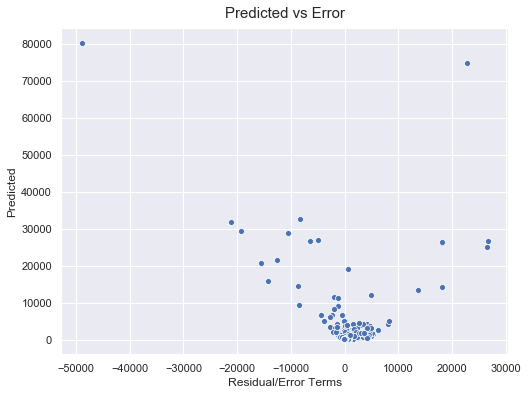

In [83]:
fig, ax = plt.subplots(figsize=(8,6)); #-----------------Setting size of the canvas

plt.title('Predicted vs Error', fontsize=15, pad=10) #---------------------Title of the chart

sns.scatterplot(lr_model_check.resid, lr_model_check.predict()) 

ax.set(xlabel='Residual/Error Terms', ylabel='Predicted'); #------------------------Changing Labels of x and y axis

plt.show()


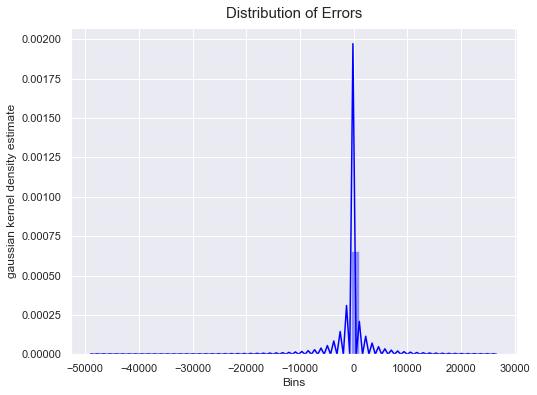

In [84]:
fig, ax = plt.subplots(figsize=(8,6)); #-----------------Setting size of the canvas

plt.title('Distribution of Errors', fontsize=15, pad=10) #---------------------Title of the chart

sns.distplot(lr_model_check.resid, hist=True, kde=True, color="blue") 

ax.set(xlabel='Bins', ylabel='gaussian kernel density estimate'); #------------------------Changing Labels of x and y axis

plt.show()


-------------------------------------------------------------------------------------------------------------------------------
Findings:

Model Results:

1. Regression model shows and R-sqaure value of 0.71106 on training data and 0.71836 on test data
2. Since R-square is closer to 1, the model is able to explain good amount of variance of the data
3. Since we have only one independent variable, multicolinearity is not a factor here

Interpretation:

1. Keeping everything constant if the total followers of a twitter user increases by 100 then the total number of list the author is listed in in increases by ~2 (1.65)

In [11]:
list=[0,1,2,3,4,5]
list=pd.DataFrame(list)
list.rename( columns = {0:'Infected Patient Count'}, inplace=True)

list['Days'] = np.arange(len(list))+1
list.set_index('Days', inplace=True)
list.head()

,Infected Patient Count
Days,
1,0
2,1
3,2
4,3
5,4


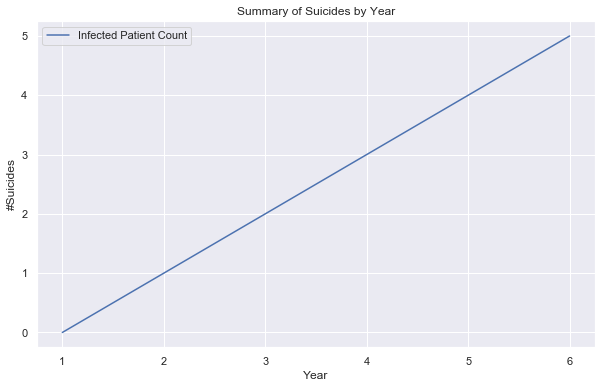

In [12]:
list.plot(kind='line', figsize=(10,6));
plt.title('Summary of Suicides by Year');
plt.xlabel('Year');
plt.ylabel('#Suicides');